# Initialization

## Load Feature

In [29]:
import pandas as pd
import os 

# rlimit/10k
rlimit=5

# online features
df = None
for filename in os.listdir(f'features/online/rlimit-{rlimit}'):
    if filename[-4:] == '.csv':
        path = os.path.join(f'features/online/rlimit-{rlimit}', filename)
        if df is None:
            df = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
        else:
            tmp = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
            assert(df['filename'].equals(tmp['filename']))
            df[os.path.splitext(filename)[0]] = tmp[os.path.splitext(filename)[0]]

# syntactic/offline features
for filename in os.listdir('features/syntactic'):
    if filename[-4:] == '.csv':
        path = os.path.join('features/syntactic', filename)
        if df is None:
            df = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
        else:
            tmp = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
            assert(df['filename'].equals(tmp['filename']))
            df[os.path.splitext(filename)[0]] = tmp[os.path.splitext(filename)[0]]
            

# display features
pd.set_option("display.max_columns", None)
df

,filename,z3-sat,z3-num-allocs,cvc5-theory::strings::checkRuns,z3-memory,z3-mk-clause,z3-num-checks,cvc5-theory::strings::restartDemands,z3-mk-bool-var,z3-propagations,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,z3-time,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,z3-conflicts,cvc5-resource::steps::resource-PreprocessStep,z3-unsat,z3-decisions,cvc5-sat,z3-del-clause,cvc5-unsat,cvc5-sat::conflicts,z3-seq-num-reductions,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,z3-seq-add-axiom,z3-seq-char2bit,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT
0,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1001_sink.smt2.out,0,233310,0.0,19.04,0,0,0.0,0,0,0.0,63.0,0.00,0.0,4,0.0,0.0,0.0,75,0,8,1,0,0,0,1,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1002_sink.smt2.out,0,233766,0.0,19.04,0,0,0.0,0,0,0.0,63.0,0.00,0.0,6,0.0,0.0,0.0,75,0,8,1,0,0,0,1,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1003_sink.smt2.out,1,525647,2.0,19.12,0,2,0.0,154,0,3.0,705.0,0.00,0.0,12,17.0,6.0,7.0,799,0,14,0,0,1,0,0,0.0,1,1.0,33.0,2.0,34.0,8,8,25.0,0,0,0,0,7,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0
3,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1006_sink.smt2.out,0,233588,0.0,19.03,0,0,0.0,0,0,0.0,63.0,0.00,0.0,5,0.0,0.0,0.0,75,0,8,1,0,0,0,1,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1007_sink.smt2.out,0,225754,0.0,19.03,0,0,0.0,0,0,0.0,63.0,0.00,0.0,7,0.0,0.0,0.0,75,0,8,1,0,0,0,1,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127114,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-reverse.smt2.out,1,957793,14.0,19.12,342,2,0.0,1217,926,68.0,3243.0,0.01,0.0,18,292.0,46.0,60.0,4012,6,9,0,53,1,2,0,0.0,39,0.0,286.0,14.0,250.0,121,8,393.0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
127115,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-rotate.smt2.out,1,957793,14.0,19.12,342,2,0.0,1217,926,68.0,3243.0,0.01,0.0,18,292.0,46.0,60.0,

In [30]:
print(f'feature shape: {df.shape}')
df.describe()

feature shape: (127119, 71)


,z3-sat,z3-num-allocs,cvc5-theory::strings::checkRuns,z3-memory,z3-mk-clause,z3-num-checks,cvc5-theory::strings::restartDemands,z3-mk-bool-var,z3-propagations,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,z3-time,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,z3-conflicts,z3-unsat,z3-decisions,cvc5-sat,z3-del-clause,cvc5-unsat,cvc5-sat::conflicts,z3-seq-num-reductions,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,z3-seq-add-axiom,z3-seq-char2bit,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT
count,127119.000000,1.271190e+05,127118.000000,127119.000000,127119.000000,127119.000000,127118.0,127119.000000,127119.000000,127118.000000,1.270780e+05,127119.000000,127118.00000,127119.000000,127118.000000,127118.000000,127118.000000,1.271190e+05,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127118.000000,127119.000000,127118.000000,127118.000000,127118.000000,127118.000000,127119.000000,127119.000000,127118.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.000000,127119.00000,127119.000000
mean,0.371109,1.588054e+06,17.942117,19.187232,1353.580881,1.364981,0.0,1850.445488,665.112792,141.594196,1.076541e+04,0.013375,0.08367,70.543105,834.771032,46.649656,72.241398,1.233673e+04,13.146910,0.354227,178.674289,0.541005,1011.251552,0.374515,1.789180,224.854388,1.953822,410.092363,30.663942,461.765163,526.537205,16.943392,1170.167545,4.079862,36.892376,6.742981,0.000031,49.109928,0.043078,0.249577,0.004177,148.634736,3.010817,21.811043,15.010699,10.797717,259.849330,0.075654,0.064609,147.451632,0.000511,7.725446,3.536356,2.893824,0.899449,0.000299,25.567295,2.144447,181.009999,1.385135,3.905923,67.617956,0.629418,83.428142,206.467405,2.951180,10.375821,3.78867,3.680496
std,0.483103,3.067880e+06,39.583130,0.477677,5118.394529,0.930896,0.0,3477.823703,2149.195581,375.320432,4.695912e+04,0.015392,0.92629,133.390510,2273.579992,121.888139,142.129133,4.770377e+04,20.784093,0.478280,318.767367,0.498318,4043.774804,0.483999,13.576736,396.075045,11.983321,730.429908,71.184044,846.349817,846.602784,25.064026,3116.272009,32.919161,65.152201,17.330810,0.005609,86.441978,0.898804,1.504708,0.074249,889.523204,22.599442,72.240814,44.007701,197.418469,1701.11

In [31]:
if 'cvc5-global::totalTime' in df.columns:
    display(df['cvc5-global::totalTime'].sort_values(ascending=False)[:30])

115489    1011
101192    1007
93754     1007
115488    1006
115324    1003
66435     1003
94758     1003
101141    1003
93832     1003
93833     1003
84712     1003
101167    1003
93736     1002
124104    1002
124144    1002
101121    1002
93771     1002
124022    1002
101111    1002
100357    1002
94931     1002
115402    1002
124150    1002
101107    1002
115395    1002
124142    1002
115358    1002
115352    1002
123672    1002
115347    1002
Name: cvc5-global::totalTime, dtype: int64

## Clean Feature

In [32]:
# There are few broken cases when collecting features
# However, they can run normally. So the broken results are due to runtime issues instead of the benchmark itself.
# We can collect their features again in another run. 
# Alternatively, we can ignore them and treat them as a normal failure in the runtime. 
with pd.option_context('display.max_rows', None,):
    display(df.isna().sum())

filename                                          0
z3-sat                                            0
z3-num-allocs                                     0
cvc5-theory::strings::checkRuns                   1
z3-memory                                         0
z3-mk-clause                                      0
z3-num-checks                                     0
cvc5-theory::strings::restartDemands              1
z3-mk-bool-var                                    0
z3-propagations                                   0
cvc5-sat::decisions                               1
cvc5-resource::steps::resource-RewriteStep       41
z3-time                                           0
cvc5-Instantiate::Instantiations_Total            1
cvc5-global::totalTime                            0
cvc5-theory::strings::propagations                1
cvc5-theory::strings::requirePhase                1
cvc5-theory::strings::lemmas                      1
cvc5-resource::resourceUnitsUsed                  0
z3-conflicts

In [33]:
# Failure rate: less than 0.1%
num_fail = df[df.isna().any(axis=1)].shape[0]
print(f'Total broken cases: {num_fail}')
print(f'Failure rate: {num_fail/df.shape[0]}')

Total broken cases: 41
Failure rate: 0.00032253243024252866


In [34]:
df[df.isna().any(axis=1)]

,filename,z3-sat,z3-num-allocs,cvc5-theory::strings::checkRuns,z3-memory,z3-mk-clause,z3-num-checks,cvc5-theory::strings::restartDemands,z3-mk-bool-var,z3-propagations,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,z3-time,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,z3-conflicts,cvc5-resource::steps::resource-PreprocessStep,z3-unsat,z3-decisions,cvc5-sat,z3-del-clause,cvc5-unsat,cvc5-sat::conflicts,z3-seq-num-reductions,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,z3-seq-add-axiom,z3-seq-char2bit,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT
56624,./SMT-LIB/QF_SLIA/20180523-Reynolds/kaluza/unsat/small/35512.corecstrs.readable.smt2.out,1,208223,1.0,18.94,0,0,0.0,0,0,0.0,NaN,0.00,0.0,2,0.0,0.0,0.0,12,0,1,0,0,1,0,0,0.0,0,0.0,2.0,1.0,2.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93651,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_cvc4/lib_int-email__parsedate_tz/0.smt2.out,0,389300,NaN,19.03,0,0,NaN,0,0,NaN,NaN,0.01,NaN,1000,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,0,12,0,0,42,23,0,1,27521,0,16,0,4,55016,0,0,27705,0,12,0,6,2,0,0,1,55206,6,6,0,0,5,27705,6,0,0,7
93730,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_cvc4/lib_int-ipaddress__ip_int_from_string/157.smt2.out,0,299999,0.0,19.13,0,0,0.0,0,0,0.0,NaN,0.01,0.0,1002,0.0,0.0,0.0,3,0,NaN,0,0,0,0,0,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,225,19,0,196,0,0,0,9189,0,44,0,272,18595,14,0,9126,0,44,0,0,50,0,0,11,18201,0,22,0,0,11,9126,0,0,0,18
93732,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_cvc4/lib_int-ipaddress__ip_int_from_string/159.smt2.out,0,299985,0.0,19.13,0,0,0.0,0,0,0.0,NaN,0.01,0.0,1001,0.0,0.0,0.0,3,0,NaN,0,0,0,0,0,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,223,19,0,194,0,0,0,9189,0,44,0,270,18595,14,0,9126,0,44,0,0,50,0,0,11,18201,0,22,0,0,11,9126,0,0,0,18
93736,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_cvc4/lib_int-ipaddress__ip_int_from_string/167.smt2.out,0,299932,0.0,19.13,0,0,0.0,0,0,0.0,NaN,0.01,0.0,1002,0.0,0.0,0.0,3,0,NaN,0,0,0,0,0,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,215,19,0,186,0,0,0,9189,0,44,0,262,18595,14,0,9126,0,44,0,0,50,0,0,11,18201,0,22,0,0,11,9126,0,0,0,18
93741,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_cvc4/lib_int-ipaddress__ip_int_from_string/183.smt2.out,0,305669,0.0,19.13,0,0,0.0,0,0,0.0,NaN,0.01,0.0,1001,0.0,0.0,0.0,3,0,NaN,0,0,0,0,0,0.0,0,0.0,2.0,0.0,2.0,0,0,0.0,0,200,15,0,181,0,0,0,9178,0,40,0,246,18577,13,0,9124,0,40,0,0,42,0,0,10,18201,0,20,0,0,10,9124,0,0,0,16
93752,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_cvc4/lib_int-ipaddress__ip_int_from_string/203.smt2.out,0,305981,0.0,19.13,0,0,0.0,0,0,0.0,NaN,0.01,0.0,1002,0.0,0.0,0.0,3,0,NaN,0,0,0,0,

In [35]:
# drop the data with None
df.dropna(inplace=True)
print(f'feature shape: {df.shape}')

feature shape: (127078, 71)


In [36]:
# set dtype to int
df = pd.concat([df['filename'], df.loc[:, df.columns != 'filename'].astype('int32')], axis=1)
df

,filename,z3-sat,z3-num-allocs,cvc5-theory::strings::checkRuns,z3-memory,z3-mk-clause,z3-num-checks,cvc5-theory::strings::restartDemands,z3-mk-bool-var,z3-propagations,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,z3-time,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,z3-conflicts,cvc5-resource::steps::resource-PreprocessStep,z3-unsat,z3-decisions,cvc5-sat,z3-del-clause,cvc5-unsat,cvc5-sat::conflicts,z3-seq-num-reductions,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,z3-seq-add-axiom,z3-seq-char2bit,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT
0,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1001_sink.smt2.out,0,233310,0,19,0,0,0,0,0,0,63,0,0,4,0,0,0,75,0,8,1,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1002_sink.smt2.out,0,233766,0,19,0,0,0,0,0,0,63,0,0,6,0,0,0,75,0,8,1,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1003_sink.smt2.out,1,525647,2,19,0,2,0,154,0,3,705,0,0,12,17,6,7,799,0,14,0,0,1,0,0,0,1,1,33,2,34,8,8,25,0,0,0,0,7,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0
3,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1006_sink.smt2.out,0,233588,0,19,0,0,0,0,0,0,63,0,0,5,0,0,0,75,0,8,1,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1007_sink.smt2.out,0,225754,0,19,0,0,0,0,0,0,63,0,0,7,0,0,0,75,0,8,1,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127114,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-reverse.smt2.out,1,957793,14,19,342,2,0,1217,926,68,3243,0,0,18,292,46,60,4012,6,9,0,53,1,2,0,0,39,0,286,14,250,121,8,393,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
127115,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-rotate.smt2.out,1,957793,14,19,342,2,0,1217,926,68,3243,0,0,18,292,46,60,4012,6,9,0,53,1,2,0,0,39,0,286,14,250,121,8,393,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
127116,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translat

In [37]:
# remove solved cases during collecting features
print(f'#solved during collecting features: {(df["cvc5-sat"] | df["cvc5-unsat"] | df["z3-sat"] | df["z3-unsat"]).sum()}')
df = df[(df['cvc5-sat'] != 1) & (df['cvc5-unsat'] != 1) & (df['z3-sat'] != 1) & (df['z3-unsat'] != 1)]
df = df.drop(['cvc5-sat', 'cvc5-unsat', 'z3-sat', 'z3-unsat'], axis=1, errors='ignore')
display(df)

#solved during collecting features: 117115


,filename,z3-num-allocs,cvc5-theory::strings::checkRuns,z3-memory,z3-mk-clause,z3-num-checks,cvc5-theory::strings::restartDemands,z3-mk-bool-var,z3-propagations,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,z3-time,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,z3-conflicts,cvc5-resource::steps::resource-PreprocessStep,z3-decisions,z3-del-clause,cvc5-sat::conflicts,z3-seq-num-reductions,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,z3-seq-add-axiom,z3-seq-char2bit,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT
1194,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_343_sink.smt2.out,2125079,351,19,1209,2,0,3407,1896,2425,29998,0,0,420,15078,85,429,50228,109,17,1042,897,35,546,53,1515,495,2487,725,47,23586,5,0,0,0,13,3,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1976,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10041.smt2.out,1059447,126,19,2530,2,0,3749,2165,3201,27030,0,2,278,12812,135,228,50003,85,7,692,2314,123,495,24,1480,236,2034,1116,3,19579,0,2,0,0,2,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,4,6,0,0
1977,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10112.smt2.out,1128641,143,19,2241,2,0,3485,2141,2741,28465,0,2,293,11862,152,252,50008,93,7,704,2012,69,533,22,1469,322,1806,1143,2,17863,0,2,0,0,2,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,4,6,0,0
1981,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10611.smt2.out,1346814,144,19,2540,2,0,3550,2007,3066,28598,0,5,313,12566,181,251,50151,85,7,644,2247,92,517,31,1511,320,1961,1237,2,18383,0,2,0,0,2,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,4,5,0,0
1985,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10650.smt2.out,1174176,130,19,2516,2,0,3476,1632,2268,33528,0,6,291,10271,214,279,50038,77,7,979,2265,65,453,15,1743,285,2479,1160,3,14282,0,2,0,0,2,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0,4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126993,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-reverse-fuzz-reverse.smt2.out,2510200,156,19,10014,2,0,8379,8438,2849,29106,0,1,375,11742,121,327,50007,53,9,1743,6307,33,291,1,1974,397,2239,813,72,16338,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
126994,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-reverse-fuzz-rotate.smt2.out,2510200,156,19,10014,2,0,8379,8438,2849,29106,0,1,364,11742,121,327,50007,

## Load Label

In [38]:
# df_labels = pd.read_csv("./labels.csv", on_bad_lines='warn')
df_labels = None
for filename in os.listdir('labels'):
    if filename[-4:] == '.csv':
        path = os.path.join('labels', filename)
        if df_labels is None:
            df_labels = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
        else:
            tmp = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
            assert(df_labels['filename'].equals(tmp['filename']))
            df_labels[os.path.splitext(filename)[0]] = tmp[os.path.splitext(filename)[0]]
            
# display labels
df_labels

,filename,z3-sat,z3-timeout,z3-runtime-s,z3-unknown,z3-unsat,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
0,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1001_sink.smt2.out,0,0,0.03,0,1,0,0,1,10,0
1,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1002_sink.smt2.out,0,0,0.03,0,1,0,0,1,13,0
2,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1003_sink.smt2.out,1,0,0.03,0,0,1,0,0,24,0
3,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1006_sink.smt2.out,0,0,0.03,0,1,0,0,1,12,0
4,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1007_sink.smt2.out,0,0,0.03,0,1,0,0,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...
127114,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-reverse.smt2.out,1,0,0.04,0,0,1,0,0,36,0
127115,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-rotate.smt2.out,1,0,0.04,0,0,1,0,0,48,0
127116,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-translate.smt2.out,1,0,0.04,0,0,1,0,0,49,0
127117,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate.smt2.out,1,0,0.04,0,0,1,0,0,46,0


In [39]:
print(f'label shape: {df_labels.shape[0]}')

label shape: 127119


In [40]:
df_labels.isna().sum()

filename           0
z3-sat             0
z3-timeout         0
z3-runtime-s       0
z3-unknown         0
z3-unsat           0
cvc5-sat           0
cvc5-unknown       0
cvc5-unsat         0
cvc5-runtime-ms    0
cvc5-timeout       0
dtype: int64

### Runtime Distribution of CVC5

(127119,)

Text(0.5, 1.0, 'Runtime/ms Distribution of CVC5')

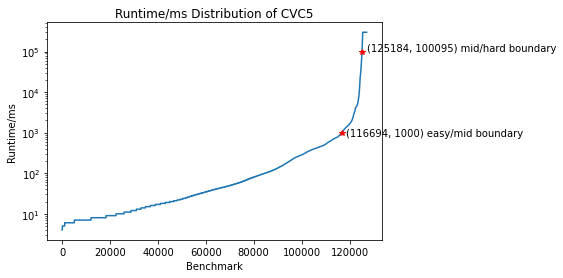

In [41]:
plot_data = df_labels['cvc5-runtime-ms'].sort_values()
axes = plot_data.plot(use_index=False, logy=True)

display(plot_data.shape)

x, y = plot_data.searchsorted(1000), plot_data.iloc[plot_data.searchsorted(1000)]
axes.plot(x, y, 'r*')
axes.annotate(f'({x}, {y}) easy/mid boundary', (x+2000,y-200))

x, y = plot_data.searchsorted(100000), plot_data.iloc[plot_data.searchsorted(100000)]
axes.plot(x, y, 'r*')
axes.annotate(f'({x}, {y}) mid/hard boundary', (x+2000,y-200))

axes.set_ylabel("Runtime/ms")
axes.set_xlabel("Benchmark") 
axes.set_title('Runtime/ms Distribution of CVC5')

### Validation

In [42]:
## cvc5
#only 0 or 1, which means a benchmark is exclusively sat, unsat, unknown, or unsolved. (unknown is unsolved.)
print("There should be only 0 and 1:")
print(df_labels[['cvc5-sat','cvc5-unsat','cvc5-unknown']].sum(axis=1).value_counts())

# except unknown cases, all sat and unsat benchmarks returned within 300s while unsolved benchmarks reached the timelimit.
print( f"\n#Unsolved cases but running less than 300s: {((df_labels['cvc5-runtime-ms'] <= 300000) != (df_labels['cvc5-sat']+df_labels['cvc5-unsat'])).sum()}" )
print( f'#unknown cases: {df_labels["cvc5-unknown"].sum()}')

print('\nunknown cases:')
display( df_labels.loc[df_labels['cvc5-unknown']==1])

## z3
#only 0 or 1, which means a benchmark is exclusively sat, unsat, unknown, or unsolved. (unknown is unsolved.)
print("There should be only 1:")
print(df_labels[['z3-sat','z3-unsat','z3-unknown']].sum(axis=1).value_counts())

# except unknown cases, all sat and unsat benchmarks returned within 300s while unsolved benchmarks reached the timelimit.
print( f"\n#Unsolved cases but running less than 300s: {((df_labels['z3-runtime-s'] <= 299) != (df_labels['z3-sat']+df_labels['z3-unsat'])).sum()}" )
print( f'#unknown cases: {df_labels["z3-unknown"].sum()}')

There should be only 0 and 1:
1    125511
0      1608
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,z3-sat,z3-timeout,z3-runtime-s,z3-unknown,z3-unsat,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,0,307.88,1,0,0,1,0,8279,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,0,307.07,1,0,0,1,0,8147,0


There should be only 1:
1    127119
dtype: int64

#Unsolved cases but running less than 300s: 1
#unknown cases: 4657


### Quntify Runtime

In [43]:
import numpy as np

# easy: <= 1s
# mid: (1, 100]s
# hard: > 100s
num_labels = 3
legends = ['easy', 'intermediate', 'hard']
df_labels['cvc5-hardness'] = 0 * (df_labels['cvc5-runtime-ms']<=1000) + \
                             1 * ( (df_labels['cvc5-runtime-ms'] > 1000) & (df_labels['cvc5-runtime-ms'] <= 100000) ) + \
                             2 * (df_labels['cvc5-runtime-ms'] > 100000)
df_labels['z3-hardness'] = 0 * (df_labels['z3-runtime-s']<=1) + \
                           1 * ( (df_labels['z3-runtime-s'] > 1) & (df_labels['z3-runtime-s'] <= 100) ) + \
                           2 * (df_labels['z3-runtime-s'] > 100)

# display 
df_labels.iloc[np.random.randint(0, df_labels.shape[0], 20)]

,filename,z3-sat,z3-timeout,z3-runtime-s,z3-unknown,z3-unsat,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness,z3-hardness
68268,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/76af2506e1e1fbf42b765361b468ec4274522c86228c04ead87c8e6f.smt2.out,1,0,1.92,0,0,1,0,0,497,0,0,1
43567,./SMT-LIB/QF_SLIA/20180523-Reynolds/kaluza/sat/small/19280.corecstrs.readable.smt2.out,1,0,0.03,0,0,1,0,0,7,0,0,0
42613,./SMT-LIB/QF_SLIA/20180523-Reynolds/kaluza/sat/small/17489.corecstrs.readable.smt2.out,1,0,0.03,0,0,1,0,0,5,0,0,0
117952,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_8906.corecstrs.readable.smt2.out,1,0,25.68,0,0,1,0,0,727,0,0,1
45891,./SMT-LIB/QF_SLIA/20180523-Reynolds/kaluza/sat/small/5369.corecstrs.readable.smt2.out,1,0,0.03,0,0,1,0,0,9,0,0,0
21243,./SMT-LIB/QF_S/zaligvinder/models/automatark/simplenew/instance7441.smt2.out,1,0,0.15,0,0,1,0,0,95,0,0,0
95939,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_z3seq/leetcode_int-restoreIpAddresses/1324.smt2.out,0,0,0.03,0,1,0,0,1,37,0,0,0
97639,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_z3seq/leetcode_int-restoreIpAddresses/2924.smt2.out,0,0,0.03,0,1,0,0,1,45,0,0,0
41993,./SMT-LIB/QF_SLIA/20180523-Reynolds/kaluza/sat/small/1646.corecstrs.readable.smt2.out,1,0,0.03,0,0,1,0,0,8,0,0,0
122579,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_25338.corecstrs.readable.smt2.out,1,0,0.03,0,0,1,0,0,15,0,0,0


In [44]:
# align with features
df_labels = df_labels.iloc[df.index]

assert(df_labels['filename'].equals(df['filename']))

labels = df_labels.loc[:, 'cvc5-hardness'].to_numpy()

In [45]:
df_labels

,filename,z3-sat,z3-timeout,z3-runtime-s,z3-unknown,z3-unsat,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness,z3-hardness
1194,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_343_sink.smt2.out,0,0,302.30,1,0,0,0,0,300002,0,2,2
1976,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10041.smt2.out,1,0,0.30,0,0,1,0,0,9300,0,1,0
1977,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10112.smt2.out,1,0,0.17,0,0,1,0,0,1018,0,1,0
1981,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10611.smt2.out,1,0,0.07,0,0,1,0,0,15220,0,1,0
1985,./SMT-LIB/QF_S/2020-sygus-qgen/queries-no-ree/query10650.smt2.out,1,0,0.07,0,0,1,0,0,6886,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126993,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-reverse-fuzz-reverse.smt2.out,1,0,0.12,0,0,1,0,0,28489,0,1,0
126994,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-reverse-fuzz-rotate.smt2.out,1,0,0.12,0,0,1,0,0,31458,0,1,0
126995,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-reverse-fuzz-translate.smt2.out,1,0,0.12,0,0,1,0,0,27256,0,1,0
127033,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-rotate-fuzz-fuzz.smt2.out,1,0,0.36,0,0,0,0,0,300002,0,2,0


### Benchmark Difficulty Distribution

In [46]:
df_labels['cvc5-hardness'].value_counts().sort_index()

0    1703
1    6589
2    1671
Name: cvc5-hardness, dtype: int64

In [47]:
df_labels['cvc5-hardness'].value_counts(normalize=True).sort_index()

0    0.170932
1    0.661347
2    0.167721
Name: cvc5-hardness, dtype: float64

In [48]:
df_labels['z3-hardness'].value_counts().sort_index()

0    2078
1    4737
2    3148
Name: z3-hardness, dtype: int64

In [49]:
df_labels['z3-hardness'].value_counts(normalize=True).sort_index()

0    0.208572
1    0.475459
2    0.315969
Name: z3-hardness, dtype: float64

# Classification

In [50]:
# config
flag_offline = True
flag_online_cvc5 = True
flag_online_z3 = False

In [51]:
# AutoML
from autogluon.tabular import TabularPredictor, TabularDataset
from sklearn.model_selection import train_test_split

if not flag_offline:
    # remove offline features
    df = df[df.columns.drop(list(df.filter(regex='syntactic-.*')))]
if not flag_online_cvc5:
    # remove cvc5 online features
    df = df[df.columns.drop(list(df.filter(regex='cvc5-.*')))]
if not flag_online_z3:
    # remove z3 online features
    df = df[df.columns.drop(list(df.filter(regex='z3-.*')))]
    
# set hardness
df_labels = df_labels.rename(columns={'cvc5-hardness': 'hardness'})

# remove collecting time
df = df[df.columns.drop(['cvc5-global::totalTime'], errors='ignore')]

# normalization
df_features = df.loc[:, df.columns != 'filename']
features_mean, features_std = df_features.mean(), df_features.std()
df_features = (df_features-features_mean)/features_std

# split dataset
df_all = pd.concat([df_features, df_labels['hardness']], axis=1)
df_train, df_test = train_test_split(df_all, test_size=0.2, random_state=42)

# # Strictly speaking, only training data can be used to standardize features.
# df_train_features = df_train.loc[:, df_train.columns != 'hardness']
# df_train.loc[:, df_train.columns != 'hardness'] = (df_train_features-df_train_features.mean())/df_train_features.std()
# df_test.loc[:, df_test.columns != 'hardness'] = (df_test.loc[:, df_test.columns != 'hardness']-df_train_features.mean())/df_train_features.std()

df_train = TabularDataset(data=df_train)
df_test = TabularDataset(data=df_test)

display(df_train)
display(df_test)

,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT,hardness
66630,1.440523,NaN,-0.212567,-0.132315,-0.19846,-0.236984,-0.419925,-0.048742,-0.132026,-0.390071,-0.038630,0.168994,-0.501116,1.226523,-0.637354,-0.210239,0.304708,0.201916,0.604127,-0.017354,-0.242585,-0.083214,-0.128374,-0.031377,-0.336814,-0.278816,0.066039,-0.447829,-0.090385,-0.238224,-0.197985,-0.071341,-0.329928,NaN,-0.096709,-0.285339,-0.276745,-0.363289,-0.017354,-0.486524,-0.066173,-0.229485,-0.222282,-0.097348,-0.155197,-0.032691,-0.118012,-0.344934,-0.335791,0.049150,-0.383569,-0.471315,1
69099,1.427169,NaN,-0.147321,-0.134714,-0.19846,-0.531573,-0.233731,0.076291,-0.132440,-0.390071,-0.201024,-0.189703,-0.151938,1.072514,-0.297681,-0.501841,-0.303619,1.461690,2.589967,-0.017354,0.064270,-0.083214,-0.128374,-0.031377,0.173952,-0.278816,0.621662,-0.447829,-0.122260,-0.295620,-0.197985,-0.071341,0.111666,NaN,-0.096709,-0.285339,-0.276745,-0.363289,-0.017354,-0.486524,-0.066173,-0.189038,-0.222282,-0.050992,1.506557,-0.032691,1.574449,0.256699,-0.335791,-0.411627,-0.383569,-0.471315,1
123958,0.585830,NaN,1.641267,-0.201467,-0.19846,2.201905,-0.169632,-0.236291,-0.129850,-0.385314,-0.071109,0.491821,-0.173951,0.217764,1.130749,2.468567,-0.334035,-0.762197,-0.554280,-0.017354,-0.515878,-0.083214,-0.128374,-0.031377,-0.387755,0.014059,-0.350679,-0.436259,-0.132885,-0.313317,-0.197985,-0.071341,-0.388868,NaN,-0.096709,-0.090534,-0.080283,-0.363289,-0.017354,-0.400959,-0.066173,-0.306019,-0.222282,-0.097348,-0.421078,-0.032691,-0.436555,-0.433543,-0.294955,-0.434666,-0.301241,-0.471315,1
77392,1.480587,NaN,-0.218241,-0.127316,-0.19846,-0.195673,-0.410768,-0.009257,-0.126363,-0.390071,-0.006151,-0.010354,-0.429762,1.195721,-0.502798,-0.157526,0.101932,0.343320,0.714451,-0.017354,-0.194639,-0.083214,-0.128374,-0.031377,-0.104197,-0.278816,0.130149,-0.447829,-0.079760,-0.259748,-0.197985,-0.071341,-0.171525,NaN,-0.096709,-0.285339,-0.276745,-0.363289,-0.017354,-0.486524,-0.066173,-0.251282,-0.222282,-0.097348,0.313418,-0.032691,0.345324,-0.144114,-0.335791,-0.104442,-0.383569,-0.471315,1
62378,1.600778,NaN,-0.364335,-0.128322,-0.19846,-0.297707,-0.416873,-0.009257,-0.131941,-0.390071,-0.038630,0.133124,-0.446462,1.211122,-0.638995,-0.224005,-0.131260,0.381884,0.990263,-0.017354,-0.209023,-0.083214,-0.128374,-0.031377,-0.366567,-0.278816,0.140834,-0.447829,-0.090385,-0.285576,-0.

,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount,syntactic-cvc5::TERM-STRING_REPLACE,syntactic-cvc5::TERM-NOT,syntactic-cvc5::TERM-STRING_CONTAINS,syntactic-cvc5::TERM-IMPLIES,syntactic-cvc5::TERM-EQUAL,syntactic-cvc5::TERM-OR,syntactic-cvc5::TERM-REGEXP_OPT,syntactic-cvc5::TERM-STRING_SUFFIX,syntactic-cvc5::TERM-STRING_LENGTH,syntactic-cvc5::TERM-REGEXP_STAR,syntactic-cvc5::TERM-ITE,syntactic-cvc5::TERM-REGEXP_CONCAT,syntactic-cvc5::TERM-STRING_CHARAT,syntactic-cvc5::TERM-ADD,syntactic-cvc5::TERM-MULT,syntactic-cvc5::TERM-REGEXP_COMPLEMENT,syntactic-cvc5::TERM-STRING_SUBSTR,syntactic-cvc5::TERM-INTS_DIVISION,syntactic-cvc5::TERM-STRING_TO_INT,syntactic-cvc5::TERM-REGEXP_UNION,syntactic-cvc5::TERM-REGEXP_PLUS,syntactic-cvc5::TERM-LT,syntactic-cvc5::TERM-REGEXP_INTER,syntactic-cvc5::TERM-STRING_TO_REGEXP,syntactic-cvc5::TERM-NEG,syntactic-cvc5::TERM-STRING_INDEXOF,syntactic-cvc5::TERM-REGEXP_RANGE,syntactic-cvc5::TERM-STRING_PREFIX,syntactic-cvc5::TERM-GEQ,syntactic-cvc5::TERM-STRING_FROM_INT,syntactic-cvc5::TERM-AND,syntactic-cvc5::TERM-SUB,syntactic-cvc5::TERM-STRING_IN_REGEXP,syntactic-cvc5::TERM-STRING_CONCAT,syntactic-cvc5::TERM-LEQ,syntactic-cvc5::TERM-GT,hardness
12415,-0.068545,NaN,2.493719,-0.189095,-0.198460,0.227362,-0.331407,-0.463325,-0.132409,-0.371042,2.429752,-0.010354,-0.807785,0.079156,-0.365780,0.341571,-0.334035,-0.723632,-0.554280,-0.017354,-0.515878,-0.083214,0.560736,-0.031377,-0.388206,-0.220241,-0.350679,-0.320558,-0.132885,-0.313317,-0.197985,-0.071341,-0.388868,NaN,-0.096709,0.084791,-0.139221,-0.363289,-0.017354,-0.244092,-0.066173,-0.306019,8.203332,-0.097348,-0.421078,-0.032691,-0.436555,-0.433543,-0.131611,-0.434666,-0.383569,-0.471315,1
73186,1.373750,NaN,-0.355824,-0.128903,-0.198460,-0.385746,-0.383297,-0.048742,-0.131941,-0.390071,-0.103588,-0.010354,-0.383458,1.195721,-0.610279,-0.380802,0.801508,0.587561,0.604127,-0.017354,-0.089157,-0.083214,-0.128374,-0.031377,1.413674,-0.278816,0.237000,-0.447829,-0.040801,-0.185850,-0.197985,-0.071341,1.051032,NaN,-0.096709,-0.285339,-0.276745,-0.363289,-0.017354,-0.486524,-0.066173,-0.176444,-0.222282,-0.097348,3.002136,-0.032691,2.964455,1.771752,-0.335791,0.425452,-0.383569,-0.471315,1
13285,-0.268864,NaN,2.570312,-0.214459,-0.198460,2.182717,0.153919,0.188163,-0.132409,-0.380556,1.292997,-0.189703,-0.243787,-0.367470,-0.426494,1.929012,-0.334035,-0.762197,-0.554280,-0.017354,-0.515878,-0.083214,1.938957,-0.031377,-0.388206,-0.259291,-0.350679,-0.332128,-0.132885,-0.313317,-0.197985,11.644667,-0.388868,NaN,-0.096709,-0.226897,-0.276745,-0.363289,-0.017354,-0.400959,-0.066173,-0.306019,5.139473,-0.097348,-0.421078,-0.032691,-0.436555,-0.433543,-0.213283,-0.434666,-0.383569,-0.471315,2
2193,0.065001,NaN,3.673819,-0.268306,-0.198460,1.729433,-0.288674,-0.479776,-0.132455,-0.390071,3.728900,0.348343,-0.436594,0.518082,-0.620124,2.288268,-0.334035,-0.736487,-0.554280,-0.017354,-0.506289,-0.083214,-0.128374,-0.031377,-0.388206,-0.259291,-0.350679,-0.401549,-0.132885,-0.313317,-0.197985,-0.071341,-0.388868,NaN,-0.096709,-0.285339,-0.276745,-0.363289,-0.017354,-0.443741,-0.066173,-0.306019,-0.222282,-0.097348,-0.421078,-0.032691,-0.434946,-0.433543,-0.172447,-0.365549,-0.383569,-0.471315,1
84420,-0.095254,NaN,0.394503,-0.139968,5.106865,-0.420284,-0.020066,0.204615,-0.131707,-0.290167,-0.233502,-0.297312,0.164599,0.456478,-0.654584,-0.443252,-0.334035,-0.672213,-0.554280,-0.017354,-0.429575,-0.083214,-0.128374,-0.031377,-0.345379,-0.278816,0.023298,-0.447829,0.058367,-0.297533,

In [52]:
# train
predictor_auto = TabularPredictor(label="hardness", eval_metric = 'balanced_accuracy', sample_weight='balance_weight',
                                  verbosity=2
                                 ).fit(train_data=df_train, time_limit=10*60, holdout_frac=0.25)

No path specified. Models will be saved in: "AutogluonModels/ag-20220726_053051/"
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220726_053051/"
AutoGluon Version:  0.4.1
Python Version:     3.9.12
Operating System:   Linux
Train Data Rows:    7970
Train Data Columns: 52
Label Column: hardness
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Assigning sample weights to balance differences in frequency of classes.
Trai

[22:32:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


	0.9195	 = Validation score   (balanced_accuracy)
	3.69s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ... Training model for up to 526.32s of the 526.32s of remaining time.
	0.8138	 = Validation score   (balanced_accuracy)
	4.49s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBMLarge ... Training model for up to 521.78s of the 521.78s of remaining time.
	0.9124	 = Validation score   (balanced_accuracy)
	6.39s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 514.37s of remaining time.
	0.9266	 = Validation score   (balanced_accuracy)
	0.79s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 86.45s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220726_053051/")


In [53]:
# train result
predictor_auto.leaderboard(df_train, silent=True, extra_metrics=['accuracy'])

,model,score_test,accuracy,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.974492,0.969385,0.918348,0.027327,0.013056,55.765867,0.027327,0.013056,55.765867,1,True,8
1,ExtraTreesEntr,0.974036,0.978921,0.899031,0.213649,0.177351,0.957533,0.213649,0.177351,0.957533,1,True,10
2,ExtraTreesGini,0.973805,0.979172,0.898110,0.188836,0.177415,1.033210,0.188836,0.177415,1.033210,1,True,9
3,RandomForestEntr,0.973245,0.978419,0.895870,0.284646,0.121014,0.801576,0.284646,0.121014,0.801576,1,True,7
4,RandomForestGini,0.972617,0.977917,0.893364,0.201757,0.120562,0.873791,0.201757,0.120562,0.873791,1,True,6
5,KNeighborsDist,0.971295,0.975659,0.888076,0.029389,0.006914,0.013608,0.029389,0.006914,0.013608,1,True,2
6,LightGBMLarge,0.968697,0.959724,0.912399,0.040747,0.008184,6.386101,0.040747,0.008184,6.386101,1,True,13
7,WeightedEnsemble_L2,0.966837,0.951694,0.926553,0.665239,0.281884,76.439582,0.017514,0.000660,0.786770,2,True,14
8,LightGBM,0.957109,0.933877,0.923891,0.058430,0.008426,2.321362,0.058430,0.008426,2.321362,1,True,5
9,XGBoost,0.945122,0.920828,0.919472,0.047906,0.012405,3.691839,0.047906,0.012405,3.691839,1,True,11


In [54]:
# validation result
predictor_auto.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.926553,0.281884,76.439582,0.000660,0.786770,2,True,14
1,LightGBM,0.923891,0.008426,2.321362,0.008426,2.321362,1,True,5
2,LightGBMXT,0.921634,0.011413,1.954729,0.011413,1.954729,1,True,4
3,XGBoost,0.919472,0.012405,3.691839,0.012405,3.691839,1,True,11
4,CatBoost,0.918348,0.013056,55.765867,0.013056,55.765867,1,True,8
5,LightGBMLarge,0.912399,0.008184,6.386101,0.008184,6.386101,1,True,13
6,ExtraTreesEntr,0.899031,0.177351,0.957533,0.177351,0.957533,1,True,10
7,ExtraTreesGini,0.898110,0.177415,1.033210,0.177415,1.033210,1,True,9
8,RandomForestEntr,0.895870,0.121014,0.801576,0.121014,0.801576,1,True,7
9,RandomForestGini,0.893364,0.120562,0.873791,0.120562,0.873791,1,True,6


In [55]:
# test result
predictor_auto.leaderboard(df_test, silent=True, extra_metrics=['accuracy'])

,model,score_test,accuracy,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.914633,0.905670,0.926553,0.417705,0.281884,76.439582,0.005555,0.000660,0.786770,2,True,14
1,LightGBM,0.909121,0.896136,0.923891,0.029216,0.008426,2.321362,0.029216,0.008426,2.321362,1,True,5
2,CatBoost,0.907446,0.916207,0.918348,0.019607,0.013056,55.765867,0.019607,0.013056,55.765867,1,True,8
3,LightGBMXT,0.907108,0.879579,0.921634,0.020870,0.011413,1.954729,0.020870,0.011413,1.954729,1,True,4
4,XGBoost,0.905188,0.888108,0.919472,0.012181,0.012405,3.691839,0.012181,0.012405,3.691839,1,True,11
5,LightGBMLarge,0.901501,0.905670,0.912399,0.044156,0.008184,6.386101,0.044156,0.008184,6.386101,1,True,13
6,KNeighborsDist,0.887341,0.916207,0.888076,0.010799,0.006914,0.013608,0.010799,0.006914,0.013608,1,True,2
7,ExtraTreesEntr,0.883724,0.916708,0.899031,0.233951,0.177351,0.957533,0.233951,0.177351,0.957533,1,True,10
8,RandomForestGini,0.881163,0.916207,0.893364,0.183175,0.120562,0.873791,0.183175,0.120562,0.873791,1,True,6
9,ExtraTreesGini,0.880638,0.915203,0.898110,0.186425,0.177415,1.033210,0.186425,0.177415,1.033210,1,True,9


In [59]:
# print path to saved model
display(predictor_auto.path)

# save normalization parameters
features_mean.to_pickle('features-mean.pkl')
features_std.to_pickle('features-std.pkl')

'AutogluonModels/ag-20220726_053051/'

In [60]:
# Detailed test (confusion matrix)
for model in predictor_auto.get_model_names():
    print(f'----- {model} -----')
    
    label_test = df_test['hardness']
    df_test_no_label = df_test.drop(columns=['hardness'])
    label_pred = predictor_auto.predict(df_test_no_label, model=model)
    # predictor_auto.evaluate_predictions(y_true=label_test, y_pred=label_pred)

    df_eval = pd.DataFrame({'label': label_test, 'prediction': label_pred})
    df_eval = df_eval.replace({0:'0-easy', 1:'1-mid', 2:'2-hard'})
    display(pd.crosstab(df_eval['prediction'], df_eval['label'], normalize='columns'))

----- KNeighborsUnif -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.878049,0.018657,0.036923
1-mid,0.109756,0.933582,0.209231
2-hard,0.012195,0.047761,0.753846


----- KNeighborsDist -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.884146,0.014925,0.009231
1-mid,0.100610,0.944030,0.156923
2-hard,0.015244,0.041045,0.833846


----- NeuralNetFastAI -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.829268,0.011940,0.009231
1-mid,0.158537,0.955224,0.301538
2-hard,0.012195,0.032836,0.689231


----- LightGBMXT -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.929878,0.023134,0.009231
1-mid,0.030488,0.852985,0.052308
2-hard,0.039634,0.123881,0.938462


----- LightGBM -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.923780,0.021642,0.006154
1-mid,0.054878,0.883582,0.073846
2-hard,0.021341,0.094776,0.920000


----- RandomForestGini -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.871951,0.013433,0.015385
1-mid,0.121951,0.950000,0.163077
2-hard,0.006098,0.036567,0.821538


----- RandomForestEntr -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.871951,0.013433,0.012308
1-mid,0.121951,0.950746,0.172308
2-hard,0.006098,0.035821,0.815385


----- CatBoost -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.914634,0.021642,0.003077
1-mid,0.064024,0.924627,0.113846
2-hard,0.021341,0.053731,0.883077


----- ExtraTreesGini -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.881098,0.014179,0.012308
1-mid,0.112805,0.948507,0.175385
2-hard,0.006098,0.037313,0.812308


----- ExtraTreesEntr -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.878049,0.014179,0.006154
1-mid,0.118902,0.948507,0.169231
2-hard,0.003049,0.037313,0.824615


----- XGBoost -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.908537,0.021642,0.015385
1-mid,0.064024,0.871642,0.049231
2-hard,0.027439,0.106716,0.935385


----- NeuralNetTorch -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.725610,0.006716,0.000000
1-mid,0.161585,0.819403,0.086154
2-hard,0.112805,0.173881,0.913846


----- LightGBMLarge -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.896341,0.021642,0.015385
1-mid,0.088415,0.909701,0.086154
2-hard,0.015244,0.068657,0.898462


----- WeightedEnsemble_L2 -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.920732,0.017164,0.006154
1-mid,0.060976,0.897015,0.067692
2-hard,0.018293,0.085821,0.926154


## Visulization

/home/jiong/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jiong/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(27965, 2)


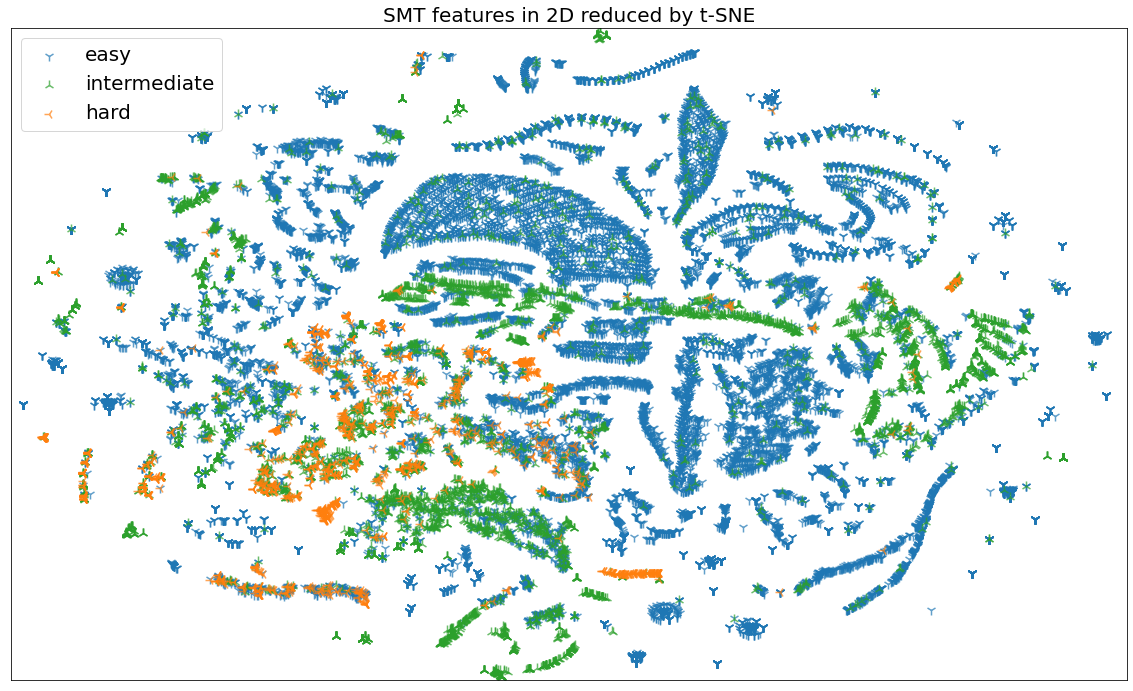

In [351]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

label_test = df_train['hardness']
feats = df_train.drop(columns=['hardness'])
label_pred = predictor_auto.predict(feats, model='LightGBM')

feats = feats.dropna(axis=1)
feats = TSNE(n_components=2).fit_transform(feats)
print(feats.shape)

num_labels = 3
x_min, x_max = feats.min() - 1, feats.max() + 1
y_min, y_max = feats.min() - 1, feats.max() + 1

plt.figure(1, figsize=(20, 12))
plt.clf()

colors = ['C0', 'C2', 'C1']
for i in range(num_labels):
    idxs = np.where(label_test == i)[0] # row index only
    # change marker
    plt.scatter(feats[idxs, 0], feats[idxs, 1], color=colors[i], marker=f'{i+1}', s=100, label=legends[i], alpha=0.7)

plt.title(
    "SMT features in 2D reduced by t-SNE", fontsize=20
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.legend(fontsize=20, markerscale=1)
plt.show()

## Feature Importance

In [352]:
predictor_auto.feature_importance(df_train, model='KNeighborsDist')

These features in provided data are not utilized by the predictor and will be ignored: ['cvc5-theory::strings::restartDemands']
Computing feature importance via permutation shuffling for 15 features using 5000 rows with 5 shuffle sets...
	1.9s	= Expected runtime (0.38s per shuffle set)
	2.16s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
cvc5-theory::strings::ee::termsCount,0.311186,0.007064,3.183522e-08,5,0.325730,0.296642
cvc5-theory::strings::ee::mergesCount,0.263905,0.009298,1.845685e-07,5,0.283049,0.244761
cvc5-shared::ee::termsCount,0.262541,0.009527,2.077011e-07,5,0.282157,0.242925
cvc5-theory::strings::propagations,0.254905,0.008621,1.567598e-07,5,0.272655,0.237154
cvc5-theory::strings::requirePhase,0.241430,0.008474,1.818171e-07,5,0.258878,0.223982
cvc5-theory::strings::lemmas,0.237090,0.015087,1.956933e-06,5,0.268154,0.206026
cvc5-theory::strings::checkRuns,0.233808,0.010283,4.478780e-07,5,0.254982,0.212635
cvc5-sat::decisions,0.225161,0.017562,4.405937e-06,5,0.261322,0.188999
cvc5-theory::strings::strategyRuns,0.176545,0.008999,8.073048e-07,5,0.195074,0.158016
cvc5-theory::strings::conflicts,0.149003,0.006643,4.728657e-07,5,0.162682,0.135325


## Random Seed Stability 

### Load Label

In [353]:
import os
import pandas as pd

# index represents random seed
df_labels_all = []
for seed in range(11):
    df_labels = None
    # print(dirname)
    for filename in os.listdir(f'labels-stability/seed-{seed}'):
        if filename[-4:] == '.csv':
            path = os.path.join(f'labels-stability/seed-{seed}', filename)
            if df_labels is None:
                df_labels = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
            else:
                tmp = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
                assert(df_labels['filename'].equals(tmp['filename']))
                df_labels[os.path.splitext(filename)[0]] = tmp[os.path.splitext(filename)[0]]
    df_labels_all.append(df_labels)
    
display(df_labels_all[0])
display(df_labels_all[1])

,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
0,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1001_sink.smt2.out,0,0,1,10,0
1,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1002_sink.smt2.out,0,0,1,13,0
2,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1003_sink.smt2.out,1,0,0,24,0
3,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1006_sink.smt2.out,0,0,1,12,0
4,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1007_sink.smt2.out,0,0,1,11,0
...,...,...,...,...,...,...
127114,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-reverse.smt2.out,1,0,0,36,0
127115,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-rotate.smt2.out,1,0,0,48,0
127116,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-translate.smt2.out,1,0,0,49,0
127117,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate.smt2.out,1,0,0,46,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
0,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1001_sink.smt2.out,0,0,1,11,0
1,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1002_sink.smt2.out,0,0,1,14,0
2,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1003_sink.smt2.out,1,0,0,28,0
3,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1006_sink.smt2.out,0,0,1,14,0
4,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1007_sink.smt2.out,0,0,1,15,0
...,...,...,...,...,...,...
127114,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-reverse.smt2.out,1,0,0,31,0
127115,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-rotate.smt2.out,1,0,0,51,0
127116,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate-translate.smt2.out,1,0,0,54,0
127117,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregextransformed/z3str2/regex-049-translate-translate.smt2.out,1,0,0,47,0


In [354]:
for df_label in df_labels_all:
    print(f'label shape: {df_label.shape[0]}')

label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119
label shape: 127119


In [355]:
df_isna = None
for df_label in df_labels_all:
    if df_isna is None:
        df_isna = df_label.isna().sum()
    else:
        df_isna += df_label.isna().sum()
df_isna

filename           0
cvc5-sat           0
cvc5-unknown       0
cvc5-unsat         0
cvc5-runtime-ms    0
cvc5-timeout       0
dtype: int64

In [356]:
## cvc5
for df_label in df_labels_all:
    #only 0 or 1, which means a benchmark is exclusively sat, unsat, unknown, or unsolved. (unknown is unsolved.)
    print("There should be only 0 and 1:")
    print(df_label[['cvc5-sat','cvc5-unsat','cvc5-unknown']].sum(axis=1).value_counts())

    # except unknown cases, all sat and unsat benchmarks returned within 300s while unsolved benchmarks reached the timelimit.
    print( f"\n#Unsolved cases but running less than 300s: {((df_label['cvc5-runtime-ms'] <= 300000) != (df_label['cvc5-sat']+df_label['cvc5-unsat'])).sum()}" )
    print( f'#unknown cases: {df_label["cvc5-unknown"].sum()}')

    print('\nunknown cases:')
    display( df_label.loc[df_labels['cvc5-unknown']==1])

There should be only 0 and 1:
1    125511
0      1608
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8279,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,8147,0


There should be only 0 and 1:
1    125517
0      1602
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8501,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,8006,0


There should be only 0 and 1:
1    125507
0      1612
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8732,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,9029,0


There should be only 0 and 1:
1    125514
0      1605
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8769,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,7265,0


There should be only 0 and 1:
1    125519
0      1600
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8747,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,9035,0


There should be only 0 and 1:
1    125502
0      1617
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,7887,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,8240,0


There should be only 0 and 1:
1    125521
0      1598
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,7879,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,6697,0


There should be only 0 and 1:
1    125513
0      1606
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8410,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,7259,0


There should be only 0 and 1:
1    125506
0      1613
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8491,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,5406,0


There should be only 0 and 1:
1    125508
0      1611
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8420,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,8150,0


There should be only 0 and 1:
1    125520
0      1599
dtype: int64

#Unsolved cases but running less than 300s: 2
#unknown cases: 2

unknown cases:


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout
102077,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_102.smt2.out,0,1,0,8303,0
102370,./SMT-LIB/QF_SLIA/20190311-str-small-rw-Noetzli/str-term-small-rw/str-term-small-rw_343.smt2.out,0,1,0,8125,0


In [357]:
import numpy as np

# easy: <= 1s
# mid: (1, 100]s
# hard: > 100s
num_labels = 3
legends = ['easy', 'intermediate', 'hard']
for df_label in df_labels_all:
    df_label['cvc5-hardness'] = 0 * (df_label['cvc5-runtime-ms']<=1000) + \
                                 1 * ( (df_label['cvc5-runtime-ms'] > 1000) & (df_label['cvc5-runtime-ms'] <= 100000) ) + \
                                 2 * (df_label['cvc5-runtime-ms'] > 100000)

indexes = np.random.randint(0, df_label.shape[0], 20)
for df_label in df_labels_all:
    # display 
    display(df_label.iloc[indexes])

,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,296,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,17,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,38,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,2918,0,1
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,72,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1639,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,791,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5397,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,353,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,24,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,326,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,19,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,42,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,32,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,77,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1510,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,35,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,6096,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,372,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,25,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,346,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,23,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,34,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,23,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,78,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1479,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,25,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,3490,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,336,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,21,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,322,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,17,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,32,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,21,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,88,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1466,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,29,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5585,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,371,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,22,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,321,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,22,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,22,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,21,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,64,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1445,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,33,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5646,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,355,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,22,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,307,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,16,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,33,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,27,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,74,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1423,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,27,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5574,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,327,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,21,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,301,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,15,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,29,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,28,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,63,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1517,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,28,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5807,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,328,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,21,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,311,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,16,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,35,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,23,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,67,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1527,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,29,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,3901,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,329,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,21,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,320,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,16,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,38,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,22,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,73,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1502,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,32,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5598,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,331,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,22,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,316,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,21,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,38,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,20,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,65,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1483,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,29,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5410,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,321,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,15,0,0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
66188,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/dee2e6cd9befc0f9e2f084e681a6916bf4c0101a755f3db0910cd4ce.smt2.out,1,0,0,323,0,0
121039,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallUnsat_23614.corecstrs.readable.smt2.out,1,0,0,17,0,0
104676,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_10052.corecstrs.readable.smt2.out,0,0,1,34,0,0
4473,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1330.smt2.out,0,0,1,23,0,0
75009,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/8e34ad7599b4b55a557502b97179fb277bd120153bc6fe7f9f13a292.smt2.out,0,0,1,70,0,0
72891,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/56f79261db0df50ddbcb84b41d998303406050ba183597b8dfa2bdc4.smt2.out,1,0,0,1433,0,1
5080,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1878.smt2.out,0,0,1,23,0,0
65920,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/d209c535917b1418b83a4b0df1816319fcc29a9b5b87b696860e3d36.smt2.out,1,0,0,5487,0,1
68065,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/pymongo/pymongo-mongoclient/5e87b605c80d09b59a0866d884a25d8dfeac4245317c6a3349f451e7.smt2.out,1,0,0,339,0,0
106003,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_11728.corecstrs.readable.smt2.out,0,0,1,25,0,0


In [358]:
for df_label in df_labels_all:
    display(df_label['cvc5-hardness'].value_counts().sort_index())
    # display(df_label['cvc5-hardness'].value_counts(normalize=True).sort_index())

0    116696
1      8488
2      1935
Name: cvc5-hardness, dtype: int64

0    117960
1      7221
2      1938
Name: cvc5-hardness, dtype: int64

0    117985
1      7186
2      1948
Name: cvc5-hardness, dtype: int64

0    117970
1      7201
2      1948
Name: cvc5-hardness, dtype: int64

0    117981
1      7199
2      1939
Name: cvc5-hardness, dtype: int64

0    117975
1      7199
2      1945
Name: cvc5-hardness, dtype: int64

0    117973
1      7202
2      1944
Name: cvc5-hardness, dtype: int64

0    117977
1      7202
2      1940
Name: cvc5-hardness, dtype: int64

0    117979
1      7196
2      1944
Name: cvc5-hardness, dtype: int64

0    117975
1      7211
2      1933
Name: cvc5-hardness, dtype: int64

0    117982
1      7204
2      1933
Name: cvc5-hardness, dtype: int64

In [359]:
# select unstable cases as random seed shifts from 0 to k where k is in [1,10].
diff_label = pd.DataFrame()
for i in range(1, len(df_labels_all)):
    diff_id = (df_labels_all[0]['cvc5-hardness'] != df_labels_all[i]['cvc5-hardness'])
    
    df_tmp = pd.DataFrame()
    df_tmp['filename'] = df_labels_all[0]['filename'].loc[diff_id]
    df_tmp['hardness-original'] = df_labels_all[0]['cvc5-hardness'].loc[diff_id]
    df_tmp['hardness-now'] = df_labels_all[i]['cvc5-hardness'].loc[diff_id]
    df_tmp['runtime-ms-original'] = df_labels_all[0]['cvc5-runtime-ms'].loc[diff_id]
    df_tmp['runtime-ms-now'] = df_labels_all[i]['cvc5-runtime-ms'].loc[diff_id]
    df_tmp['seed-now'] = i
    
    diff_label = pd.concat([diff_label, df_tmp])
display(diff_label)


,filename,hardness-original,hardness-now,runtime-ms-original,runtime-ms-now,seed-now
22,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1036_sink.smt2.out,1,0,1580,12,1
111,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1252_sink.smt2.out,1,0,1368,37,1
187,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1414_sink.smt2.out,1,0,2502,19,1
442,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1889_sink.smt2.out,1,0,1169,12,1
510,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_2008_sink.smt2.out,1,0,1575,12,1
...,...,...,...,...,...,...
124893,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/variants/3c7dcb1e.smt2.out,0,1,980,1021,10
124918,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/variants/4998095f.smt2.out,2,1,103187,97347,10
124965,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/variants/620673bf.smt2.out,1,0,2872,732,10
125108,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/variants/ad6d8060.smt2.out,1,2,99720,102763,10


In [360]:
# define relative runtime changes >= 1.5 as being really unstable, i.e. t_i >= t_0*1.5 or t_i <= t_0/1.5
relative_ratio = 3

indexes = ((diff_label['runtime-ms-now']/diff_label['runtime-ms-original'] >= relative_ratio) | (diff_label['runtime-ms-now']/diff_label['runtime-ms-original'] <= 1/relative_ratio))
diff_label = diff_label.loc[indexes]
display(diff_label)

,filename,hardness-original,hardness-now,runtime-ms-original,runtime-ms-now,seed-now
22,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1036_sink.smt2.out,1,0,1580,12,1
111,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1252_sink.smt2.out,1,0,1368,37,1
187,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1414_sink.smt2.out,1,0,2502,19,1
442,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1889_sink.smt2.out,1,0,1169,12,1
510,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_2008_sink.smt2.out,1,0,1575,12,1
...,...,...,...,...,...,...
123671,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/stringfuzz/regexdeep_regex-deep-00007-0.smt2.out,1,0,1142,171,10
123884,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexdeep/regex-deep-00004-28.smt2.out,1,0,1601,89,10
124225,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00026-10.smt2.out,1,0,1609,39,10
124292,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00076-17.smt2.out,1,0,1670,132,10


In [361]:
display(diff_label['hardness-original'].value_counts().sort_index())

cross_hardness = pd.DataFrame({'original': diff_label['hardness-original'], 'now': diff_label['hardness-now']})
cross_hardness = cross_hardness.replace({0:'0-easy', 1:'1-mid', 2:'2-hard'})
display(pd.crosstab(cross_hardness['original'], cross_hardness['now']))# , normalize='columns'))
# Interestingly, there is no change from easy to mid/hard as relative_ratio >= 3

1    9842
2      11
Name: hardness-original, dtype: int64

now,0-easy,1-mid,2-hard
original,,,
1-mid,9826,0,16
2-hard,0,11,0


### Load Feature

In [362]:
import os
import pandas as pd

# index represents random seed
df_features_all = []

for seed in range(11):
    df_feature = None
    # print(dirname)
    for filename in os.listdir(f'features/stability/seed-{seed}'):
        if filename[-4:] == '.csv':
            path = os.path.join(f'features/stability/seed-{seed}', filename)
            if df_feature is None:
                df_feature = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
            else:
                tmp = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
                assert(df_feature['filename'].equals(tmp['filename']))
                df_feature[os.path.splitext(filename)[0]] = tmp[os.path.splitext(filename)[0]]
    df_features_all.append(df_feature)
    
pd.set_option("display.max_columns", None)
indexes = np.random.randint(0, df_features_all[0].shape[0], 20)
display(df_features_all[0].iloc[indexes])
display(df_features_all[1].iloc[indexes])

# # syntactic/offline features
# df_feature_syntactic = None
# for filename in os.listdir('features-syntactic'):
#     if filename[-4:] == '.csv':
#         path = os.path.join('features-syntactic', filename)
#         if df_feature_syntactic is None:
#             df_feature_syntactic = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
#         else:
#             tmp = pd.read_csv(path, on_bad_lines='warn', names=['filename', os.path.splitext(filename)[0]])
#             assert(df_feature_syntactic['filename'].equals(tmp['filename']))
#             df_feature_syntactic[os.path.splitext(filename)[0]] = tmp[os.path.splitext(filename)[0]]
            
# # combine syntactic/offline and online features
# for idx, df_feature in enumerate(df_features_all):
#     assert(df_feature['filename'].equals(df_feature_syntactic['filename']))
#     df_features_all[idx] = pd.concat([df_feature, df_feature_syntactic.loc[:, df_feature_syntactic.columns!='filename']], axis=1)
    
display(df_features_all[0].iloc[indexes])
display(df_features_all[1].iloc[indexes])

,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
118517,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_1088.corecstrs.readable.smt2.out,4.0,0.0,9.0,2336.0,0.0,14,115.0,28.0,25.0,2628,18.0,1,0,2.0,2.0,153.0,8.0,137.0,170.0
80929,./SMT-LIB/QF_SLIA/2019-Jiang/slent/slent_kaluza_214_sink.smt2.out,1.0,0.0,1.0,541.0,0.0,5,10.0,2.0,4.0,634,25.0,1,0,0.0,0.0,27.0,1.0,22.0,14.0
77628,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/d23fcb36a0c51b1fa27fdc60abfb8a406cb2cd673985420b3ce234e7.smt2.out,1.0,0.0,4.0,9092.0,0.0,45,105.0,20.0,32.0,10082,7.0,0,0,0.0,0.0,323.0,1.0,203.0,151.0
64668,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/992555f377df7f8268285937921bb2d8857edcf28941ba2310c8c96a.smt2.out,0.0,0.0,0.0,10074.0,0.0,57,103.0,22.0,39.0,11111,7.0,0,0,0.0,0.0,355.0,0.0,249.0,154.0
107444,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_13338.corecstrs.readable.smt2.out,0.0,0.0,0.0,1191.0,0.0,8,0.0,0.0,0.0,1246,51.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
94286,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_trauc/leetcode_int-addStrings/654.smt2.out,0.0,0.0,0.0,3910.0,0.0,27,22.0,28.0,28.0,4209,33.0,0,1,1.0,0.0,149.0,0.0,122.0,34.0
119464,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_2511.corecstrs.readable.smt2.out,1.0,0.0,8.0,1312.0,0.0,8,45.0,14.0,12.0,1491,11.0,1,0,3.0,0.0,72.0,1.0,60.0,64.0
23251,./SMT-LIB/QF_S/zaligvinder/models/automatark/simplenew/instance9249.smt2.out,2.0,0.0,2.0,175.0,0.0,2,13.0,5.0,5.0,233,7.0,1,0,0.0,0.0,24.0,2.0,33.0,20.0
9202,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance5595.smt2.out,0.0,0.0,0.0,1632.0,0.0,24,0.0,0.0,0.0,1650,10.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
13889,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance9819.smt2.out,0.0,0.0,0.0,109.0,0.0,3,0.0,0.0,0.0,123,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0


,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
118517,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_1088.corecstrs.readable.smt2.out,4.0,0.0,9.0,2336.0,0.0,15,115.0,28.0,25.0,2628,18.0,1,0,2.0,2.0,153.0,8.0,137.0,170.0
80929,./SMT-LIB/QF_SLIA/2019-Jiang/slent/slent_kaluza_214_sink.smt2.out,1.0,0.0,1.0,541.0,0.0,6,10.0,2.0,4.0,634,25.0,1,0,0.0,0.0,27.0,1.0,22.0,14.0
77628,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/d23fcb36a0c51b1fa27fdc60abfb8a406cb2cd673985420b3ce234e7.smt2.out,1.0,0.0,4.0,9092.0,0.0,39,105.0,20.0,32.0,10082,7.0,0,0,0.0,0.0,323.0,1.0,203.0,151.0
64668,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/992555f377df7f8268285937921bb2d8857edcf28941ba2310c8c96a.smt2.out,0.0,0.0,0.0,10074.0,0.0,52,103.0,22.0,39.0,11111,7.0,0,0,0.0,0.0,355.0,0.0,249.0,154.0
107444,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_13338.corecstrs.readable.smt2.out,0.0,0.0,0.0,1191.0,0.0,9,0.0,0.0,0.0,1246,51.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
94286,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_trauc/leetcode_int-addStrings/654.smt2.out,0.0,0.0,0.0,3910.0,0.0,26,22.0,28.0,28.0,4209,33.0,0,1,1.0,0.0,149.0,0.0,122.0,34.0
119464,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_2511.corecstrs.readable.smt2.out,1.0,0.0,8.0,1312.0,0.0,11,45.0,14.0,12.0,1491,11.0,1,0,3.0,0.0,72.0,1.0,60.0,64.0
23251,./SMT-LIB/QF_S/zaligvinder/models/automatark/simplenew/instance9249.smt2.out,2.0,0.0,2.0,175.0,0.0,3,13.0,5.0,5.0,233,7.0,1,0,0.0,0.0,24.0,2.0,33.0,20.0
9202,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance5595.smt2.out,0.0,0.0,0.0,1632.0,0.0,21,0.0,0.0,0.0,1650,10.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
13889,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance9819.smt2.out,0.0,0.0,0.0,109.0,0.0,2,0.0,0.0,0.0,123,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0


,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
118517,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_1088.corecstrs.readable.smt2.out,4.0,0.0,9.0,2336.0,0.0,14,115.0,28.0,25.0,2628,18.0,1,0,2.0,2.0,153.0,8.0,137.0,170.0
80929,./SMT-LIB/QF_SLIA/2019-Jiang/slent/slent_kaluza_214_sink.smt2.out,1.0,0.0,1.0,541.0,0.0,5,10.0,2.0,4.0,634,25.0,1,0,0.0,0.0,27.0,1.0,22.0,14.0
77628,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/d23fcb36a0c51b1fa27fdc60abfb8a406cb2cd673985420b3ce234e7.smt2.out,1.0,0.0,4.0,9092.0,0.0,45,105.0,20.0,32.0,10082,7.0,0,0,0.0,0.0,323.0,1.0,203.0,151.0
64668,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/992555f377df7f8268285937921bb2d8857edcf28941ba2310c8c96a.smt2.out,0.0,0.0,0.0,10074.0,0.0,57,103.0,22.0,39.0,11111,7.0,0,0,0.0,0.0,355.0,0.0,249.0,154.0
107444,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_13338.corecstrs.readable.smt2.out,0.0,0.0,0.0,1191.0,0.0,8,0.0,0.0,0.0,1246,51.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
94286,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_trauc/leetcode_int-addStrings/654.smt2.out,0.0,0.0,0.0,3910.0,0.0,27,22.0,28.0,28.0,4209,33.0,0,1,1.0,0.0,149.0,0.0,122.0,34.0
119464,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_2511.corecstrs.readable.smt2.out,1.0,0.0,8.0,1312.0,0.0,8,45.0,14.0,12.0,1491,11.0,1,0,3.0,0.0,72.0,1.0,60.0,64.0
23251,./SMT-LIB/QF_S/zaligvinder/models/automatark/simplenew/instance9249.smt2.out,2.0,0.0,2.0,175.0,0.0,2,13.0,5.0,5.0,233,7.0,1,0,0.0,0.0,24.0,2.0,33.0,20.0
9202,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance5595.smt2.out,0.0,0.0,0.0,1632.0,0.0,24,0.0,0.0,0.0,1650,10.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
13889,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance9819.smt2.out,0.0,0.0,0.0,109.0,0.0,3,0.0,0.0,0.0,123,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0


,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
118517,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_1088.corecstrs.readable.smt2.out,4.0,0.0,9.0,2336.0,0.0,15,115.0,28.0,25.0,2628,18.0,1,0,2.0,2.0,153.0,8.0,137.0,170.0
80929,./SMT-LIB/QF_SLIA/2019-Jiang/slent/slent_kaluza_214_sink.smt2.out,1.0,0.0,1.0,541.0,0.0,6,10.0,2.0,4.0,634,25.0,1,0,0.0,0.0,27.0,1.0,22.0,14.0
77628,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-zz/httplib2/httplib2-entry-disposition/d23fcb36a0c51b1fa27fdc60abfb8a406cb2cd673985420b3ce234e7.smt2.out,1.0,0.0,4.0,9092.0,0.0,39,105.0,20.0,32.0,10082,7.0,0,0,0.0,0.0,323.0,1.0,203.0,151.0
64668,./SMT-LIB/QF_SLIA/20180523-Reynolds/pyex/peterc-pyex-doc-cav17-z3/httplib2/httplib2-entry-disposition/992555f377df7f8268285937921bb2d8857edcf28941ba2310c8c96a.smt2.out,0.0,0.0,0.0,10074.0,0.0,52,103.0,22.0,39.0,11111,7.0,0,0,0.0,0.0,355.0,0.0,249.0,154.0
107444,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/BigUnsat_13338.corecstrs.readable.smt2.out,0.0,0.0,0.0,1191.0,0.0,9,0.0,0.0,0.0,1246,51.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
94286,./SMT-LIB/QF_SLIA/2019-full_str_int/py-conbyte_trauc/leetcode_int-addStrings/654.smt2.out,0.0,0.0,0.0,3910.0,0.0,26,22.0,28.0,28.0,4209,33.0,0,1,1.0,0.0,149.0,0.0,122.0,34.0
119464,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/kaluza/SmallSat_2511.corecstrs.readable.smt2.out,1.0,0.0,8.0,1312.0,0.0,11,45.0,14.0,12.0,1491,11.0,1,0,3.0,0.0,72.0,1.0,60.0,64.0
23251,./SMT-LIB/QF_S/zaligvinder/models/automatark/simplenew/instance9249.smt2.out,2.0,0.0,2.0,175.0,0.0,3,13.0,5.0,5.0,233,7.0,1,0,0.0,0.0,24.0,2.0,33.0,20.0
9202,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance5595.smt2.out,0.0,0.0,0.0,1632.0,0.0,21,0.0,0.0,0.0,1650,10.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
13889,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance9819.smt2.out,0.0,0.0,0.0,109.0,0.0,2,0.0,0.0,0.0,123,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0


In [363]:
# align with labels
diff_feature = pd.DataFrame()
for i in range(1, len(df_features_all)):
    indexes = diff_label.loc[diff_label['seed-now'] == i].index
    diff_feature = pd.concat([diff_feature, df_features_all[i].loc[indexes]])
display(diff_feature)

,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
22,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1036_sink.smt2.out,0.0,0.0,0.0,63.0,0.0,3,0.0,0.0,0.0,75,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
111,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1252_sink.smt2.out,0.0,0.0,1.0,584.0,0.0,16,12.0,2.0,4.0,661,24.0,0,1,1.0,2.0,25.0,0.0,25.0,18.0
187,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1414_sink.smt2.out,0.0,0.0,1.0,499.0,0.0,8,21.0,2.0,7.0,570,14.0,0,1,1.0,2.0,45.0,0.0,46.0,31.0
442,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1889_sink.smt2.out,0.0,0.0,0.0,63.0,0.0,5,0.0,0.0,0.0,75,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
510,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_2008_sink.smt2.out,0.0,0.0,0.0,63.0,0.0,5,0.0,0.0,0.0,75,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123671,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/stringfuzz/regexdeep_regex-deep-00007-0.smt2.out,31.0,0.0,208.0,7882.0,0.0,43,1304.0,137.0,135.0,10057,8.0,0,0,3.0,3.0,669.0,54.0,870.0,1977.0
123884,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexdeep/regex-deep-00004-28.smt2.out,30.0,0.0,262.0,7593.0,0.0,48,1462.0,88.0,95.0,10062,8.0,0,0,6.0,0.0,557.0,63.0,774.0,2184.0
124225,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00026-10.smt2.out,16.0,0.0,123.0,4436.0,0.0,28,513.0,84.0,75.0,5589,8.0,1,0,0.0,1.0,358.0,16.0,472.0,796.0
124292,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00076-17.smt2.out,24.0,0.0,190.0,8485.0,0.0,67,932.0,108.0,111.0,10292,8.0,0,0,0.0,3.0,608.0,24.0,722.0,1384.0


In [364]:
# merge feature and label
assert(diff_feature['filename'].equals(diff_label['filename']))

df_diff = diff_feature
df_diff['hardness'] = diff_label['hardness-now']
display(df_diff)

,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount,hardness
22,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1036_sink.smt2.out,0.0,0.0,0.0,63.0,0.0,3,0.0,0.0,0.0,75,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0,0
111,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1252_sink.smt2.out,0.0,0.0,1.0,584.0,0.0,16,12.0,2.0,4.0,661,24.0,0,1,1.0,2.0,25.0,0.0,25.0,18.0,0
187,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1414_sink.smt2.out,0.0,0.0,1.0,499.0,0.0,8,21.0,2.0,7.0,570,14.0,0,1,1.0,2.0,45.0,0.0,46.0,31.0,0
442,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_1889_sink.smt2.out,0.0,0.0,0.0,63.0,0.0,5,0.0,0.0,0.0,75,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0,0
510,./SMT-LIB/QF_S/2019-Jiang/slog/slog_stranger_2008_sink.smt2.out,0.0,0.0,0.0,63.0,0.0,5,0.0,0.0,0.0,75,8.0,0,1,0.0,0.0,2.0,0.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123671,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/stringfuzz/regexdeep_regex-deep-00007-0.smt2.out,31.0,0.0,208.0,7882.0,0.0,43,1304.0,137.0,135.0,10057,8.0,0,0,3.0,3.0,669.0,54.0,870.0,1977.0,0
123884,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexdeep/regex-deep-00004-28.smt2.out,30.0,0.0,262.0,7593.0,0.0,48,1462.0,88.0,95.0,10062,8.0,0,0,6.0,0.0,557.0,63.0,774.0,2184.0,0
124225,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00026-10.smt2.out,16.0,0.0,123.0,4436.0,0.0,28,513.0,84.0,75.0,5589,8.0,1,0,0.0,1.0,358.0,16.0,472.0,796.0,0
124292,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00076-17.smt2.out,24.0,0.0,190.0,8485.0,0.0,67,932.0,108.0,111.0,10292,8.0,0,0,0.0,3.0,608.0,24.0,722.0,1384.0,0


In [365]:
# remove solved cases during collecting features
print(f'#solved during collecting features: {(df_diff["cvc5-sat"] | df_diff["cvc5-unsat"]).sum()}')
df_diff = df_diff[(df_diff['cvc5-sat'] != 1) & (df_diff['cvc5-unsat'] != 1)]
df_diff = df_diff.drop(['cvc5-sat', 'cvc5-unsat', 'cvc5-global::totalTime', 'filename'], axis=1, errors='ignore')
display(df_diff)

# remove NaN
df_diff.dropna(inplace=True)
display(df_diff)

#solved during collecting features: 6028


,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount,hardness
2226,36.0,0.0,241.0,7871.0,2.0,957.0,67.0,70.0,10051,7.0,30.0,5.0,426.0,64.0,487.0,1360.0,0
4042,5.0,0.0,159.0,8922.0,0.0,609.0,216.0,149.0,10392,7.0,0.0,6.0,588.0,5.0,917.0,978.0,0
4069,0.0,0.0,0.0,9554.0,0.0,215.0,3.0,108.0,10004,7.0,0.0,0.0,546.0,0.0,696.0,322.0,0
4576,0.0,0.0,0.0,70407.0,0.0,58.0,4.0,29.0,70544,8.0,1.0,1.0,155.0,0.0,493.0,87.0,0
5536,7.0,0.0,49.0,9454.0,0.0,330.0,137.0,241.0,10428,10.0,0.0,2.0,1050.0,7.0,756.0,483.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123517,26.0,0.0,235.0,7732.0,0.0,1449.0,114.0,108.0,10004,13.0,6.0,13.0,526.0,37.0,853.0,2155.0,2
123671,31.0,0.0,208.0,7882.0,0.0,1304.0,137.0,135.0,10057,8.0,3.0,3.0,669.0,54.0,870.0,1977.0,0
123884,30.0,0.0,262.0,7593.0,0.0,1462.0,88.0,95.0,10062,8.0,6.0,0.0,557.0,63.0,774.0,2184.0,0
124292,24.0,0.0,190.0,8485.0,0.0,932.0,108.0,111.0,10292,8.0,0.0,3.0,608.0,24.0,722.0,1384.0,0


,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount,hardness
2226,36.0,0.0,241.0,7871.0,2.0,957.0,67.0,70.0,10051,7.0,30.0,5.0,426.0,64.0,487.0,1360.0,0
4042,5.0,0.0,159.0,8922.0,0.0,609.0,216.0,149.0,10392,7.0,0.0,6.0,588.0,5.0,917.0,978.0,0
4069,0.0,0.0,0.0,9554.0,0.0,215.0,3.0,108.0,10004,7.0,0.0,0.0,546.0,0.0,696.0,322.0,0
4576,0.0,0.0,0.0,70407.0,0.0,58.0,4.0,29.0,70544,8.0,1.0,1.0,155.0,0.0,493.0,87.0,0
5536,7.0,0.0,49.0,9454.0,0.0,330.0,137.0,241.0,10428,10.0,0.0,2.0,1050.0,7.0,756.0,483.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123517,26.0,0.0,235.0,7732.0,0.0,1449.0,114.0,108.0,10004,13.0,6.0,13.0,526.0,37.0,853.0,2155.0,2
123671,31.0,0.0,208.0,7882.0,0.0,1304.0,137.0,135.0,10057,8.0,3.0,3.0,669.0,54.0,870.0,1977.0,0
123884,30.0,0.0,262.0,7593.0,0.0,1462.0,88.0,95.0,10062,8.0,6.0,0.0,557.0,63.0,774.0,2184.0,0
124292,24.0,0.0,190.0,8485.0,0.0,932.0,108.0,111.0,10292,8.0,0.0,3.0,608.0,24.0,722.0,1384.0,0


In [366]:
# normalization
df_diff.loc[:, df_diff.columns!='hardness'] = (df_diff.loc[:, df_diff.columns!='hardness']-features_mean)/features_std

# display(df_features.mean())
display(df_diff)

predictor_auto.leaderboard(df_diff, silent=True, extra_metrics=['accuracy'])

,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount,hardness
2226,3.576510,NaN,2.943503,-0.147608,10.833042,2.189006,0.096353,-0.091983,-0.136268,-0.297797,5.824705,1.130156,-0.359078,4.709853,0.055410,2.213076,0
4042,0.027022,NaN,1.775202,-0.132600,-0.055287,1.046746,1.871248,1.076544,-0.131397,-0.297797,-0.187845,1.410090,0.198038,-0.099407,1.498287,1.311432,0
4069,-0.545476,NaN,-0.490162,-0.123576,-0.055287,-0.246502,-0.666018,0.470093,-0.136940,-0.297797,-0.187845,-0.269516,0.053601,-0.506972,0.756716,-0.236941,0
4576,-0.545476,NaN,-0.490162,0.745362,-0.055287,-0.761832,-0.654106,-0.698434,0.727990,-0.289684,0.012573,0.010418,-1.291045,-0.506972,0.075543,-0.791618,0
5536,0.256022,NaN,0.207969,-0.125004,-0.055287,0.130969,0.930196,2.437360,-0.130882,-0.273457,-0.187845,0.290353,1.786852,0.063619,0.958047,0.143071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123517,2.431514,NaN,2.858017,-0.149592,-0.055287,3.803925,0.656219,0.470093,-0.136940,-0.249118,1.014665,3.369630,-0.015179,2.509005,1.283533,4.089535,2
123671,3.004012,NaN,2.473333,-0.147451,-0.055287,3.327983,0.930196,0.869463,-0.136183,-0.289684,0.413410,0.570287,0.476597,3.894724,1.340577,3.669397,0
123884,2.889513,NaN,3.242702,-0.151577,-0.055287,3.846596,0.346506,0.277804,-0.136111,-0.289684,1.014665,-0.269516,0.091430,4.628340,1.018447,4.157984,0
124292,2.202515,NaN,2.216876,-0.138840,-0.055287,2.106947,0.584747,0.514467,-0.132825,-0.289684,-0.187845,0.570287,0.266818,1.449338,0.843959,2.269724,0


,model,score_test,accuracy,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,0.596003,0.959948,0.742498,0.402106,0.058759,14.464102,0.402106,0.058759,14.464102,1,True,3
1,XGBoost,0.553196,0.844503,0.858980,0.019899,0.022568,2.798119,0.019899,0.022568,2.798119,1,True,11
2,KNeighborsDist,0.473321,0.594503,0.817997,0.045110,0.041421,0.025692,0.045110,0.041421,0.025692,1,True,2
3,LightGBMLarge,0.440323,0.879058,0.860986,0.133739,0.021235,3.316425,0.133739,0.021235,3.316425,1,True,13
4,LightGBMXT,0.437950,0.871990,0.851621,0.290795,0.175117,4.993140,0.290795,0.175117,4.993140,1,True,4
5,WeightedEnsemble_L2,0.436544,0.867801,0.871115,1.156678,0.524508,122.300568,0.009935,0.001540,1.833935,2,True,14
6,LightGBM,0.436105,0.866492,0.866332,0.127117,0.057421,2.634834,0.127117,0.057421,2.634834,1,True,5
7,NeuralNetTorch,0.373160,0.926178,0.757718,0.309657,0.067726,25.490180,0.309657,0.067726,25.490180,1,True,12
8,KNeighborsUnif,0.333602,0.931937,0.777561,0.042241,0.033711,0.018961,0.042241,0.033711,0.018961,1,True,1
9,CatBoost,0.319822,0.705497,0.848527,0.071654,0.058036,105.466587,0.071654,0.058036,105.466587,1,True,8


In [367]:
# Detailed test
for model in predictor_auto.get_model_names():
    print(f'----- {model} -----')
    
    diff_label = df_diff['hardness']
    diff_feature = df_diff.drop(columns=['hardness'])
    diff_pred = predictor_auto.predict(diff_feature, model=model)
    # predictor_auto.evaluate_predictions(y_true=label_test, y_pred=label_pred)

    diff_eval = pd.DataFrame({'label': diff_label, 'prediction': diff_pred})
    diff_eval = diff_eval.replace({0:'0-easy', 1:'1-mid', 2:'2-hard'})
    display(pd.crosstab(diff_eval['prediction'], diff_eval['label'], normalize='columns'))

----- KNeighborsUnif -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.938307,0.0,0.7500
1-mid,0.053783,0.0,0.1875
2-hard,0.007909,1.0,0.0625


----- KNeighborsDist -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.596098,0.000000,0.0000
1-mid,0.398365,0.636364,0.8125
2-hard,0.005537,0.363636,0.1875


----- NeuralNetFastAI -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.964144,0.000000,0.5625
1-mid,0.031374,0.636364,0.2500
2-hard,0.004482,0.363636,0.1875


----- LightGBMXT -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.876351,0.0,0.0000
1-mid,0.094648,0.0,0.5625
2-hard,0.029001,1.0,0.4375


----- LightGBM -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.870815,0.0,0.0000
1-mid,0.102821,0.0,0.5625
2-hard,0.026364,1.0,0.4375


----- RandomForestGini -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.45874,0.0,0.00
1-mid,0.54126,0.0,0.75
2-hard,0.00000,1.0,0.25


----- RandomForestEntr -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.45874,0.0,0.00
1-mid,0.54126,0.0,0.75
2-hard,0.00000,1.0,0.25


----- CatBoost -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.709465,0.0,0.00
1-mid,0.285262,0.0,0.75
2-hard,0.005273,1.0,0.25


----- ExtraTreesGini -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.458476,0.0,0.00
1-mid,0.541524,0.0,0.75
2-hard,0.000000,1.0,0.25


----- ExtraTreesEntr -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.457422,0.0,0.00
1-mid,0.542578,0.0,0.75
2-hard,0.000000,1.0,0.25


----- XGBoost -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.847087,0.0,0.0000
1-mid,0.084366,0.0,0.1875
2-hard,0.068547,1.0,0.8125


----- NeuralNetTorch -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.931980,0.636364,0.6250
1-mid,0.064593,0.000000,0.1875
2-hard,0.003427,0.363636,0.1875


----- LightGBMLarge -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.883470,0.0,0.0000
1-mid,0.081730,0.0,0.5625
2-hard,0.034801,1.0,0.4375


----- WeightedEnsemble_L2 -----


label,0-easy,1-mid,2-hard
prediction,,,
0-easy,0.872133,0.0,0.0000
1-mid,0.103085,0.0,0.5625
2-hard,0.024782,1.0,0.4375


In [368]:
# prepare features and labels for seed == 0

df_feature_0 = df_features_all[0].iloc[df_diff.index]
# df_label_0 = df_labels_all[0].iloc[df_diff.index]
display(df_feature_0)
# display(df_label_0)

# remove solved cases during collecting features
print(f'#solved during collecting features: {(df_feature_0["cvc5-sat"] | df_feature_0["cvc5-unsat"]).sum()}')
assert(df_diff.index.equals(df_feature_0.index))
df_diff = df_diff[(df_feature_0['cvc5-sat'] != 1) & (df_feature_0['cvc5-unsat'] != 1)]
df_feature_0 = df_feature_0[(df_feature_0['cvc5-sat'] != 1) & (df_feature_0['cvc5-unsat'] != 1)]
df_feature_0 = df_feature_0.drop(['cvc5-sat', 'cvc5-unsat', 'cvc5-global::totalTime', 'filename'], axis=1, errors='ignore')
display(df_feature_0)

# align labels with features
df_label_0 = df_labels_all[0].iloc[df_feature_0.index]
display(df_label_0)

# normalization
df_feature_0 = (df_feature_0-features_mean)/features_std
display(df_feature_0)

    

,filename,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-global::totalTime,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat,cvc5-unsat,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
2226,./SMT-LIB/QF_S/2020-sygus-qgen/queries/query5202.smt2.out,36.0,0.0,241.0,7871.0,2.0,48,957.0,67.0,70.0,10051,7.0,0,0,30.0,5.0,426.0,64.0,487.0,1360.0
4042,./SMT-LIB/QF_S/zaligvinder/models/RegExBenchmarks/stringfuzz/regexsmall_regex-small-00033-0.smt2.out,5.0,0.0,159.0,8922.0,0.0,45,609.0,216.0,149.0,10392,7.0,0,0,0.0,6.0,588.0,5.0,917.0,978.0
4069,./SMT-LIB/QF_S/zaligvinder/models/RegExBenchmarks/stringfuzz/regexsmall_regex-small-00059-1.smt2.out,0.0,0.0,0.0,9554.0,0.0,23,215.0,3.0,108.0,10004,7.0,0,0,0.0,0.0,546.0,0.0,696.0,322.0
4576,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1423.smt2.out,0.0,0.0,0.0,70407.0,0.0,38,58.0,4.0,29.0,70544,8.0,0,0,1.0,1.0,155.0,0.0,493.0,87.0
5536,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance2289.smt2.out,7.0,0.0,49.0,9454.0,0.0,52,330.0,137.0,241.0,10428,10.0,0,0,0.0,2.0,1050.0,7.0,756.0,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123517,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/nornbenchmarks/HammingDistance_norn-benchmark-895.smt2.out,26.0,0.0,235.0,7732.0,0.0,64,1449.0,114.0,108.0,10004,13.0,0,0,6.0,13.0,526.0,37.0,853.0,2155.0
123671,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/stringfuzz/regexdeep_regex-deep-00007-0.smt2.out,31.0,0.0,208.0,7882.0,0.0,50,1304.0,137.0,135.0,10057,8.0,0,0,3.0,3.0,669.0,54.0,870.0,1977.0
123884,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexdeep/regex-deep-00004-28.smt2.out,30.0,0.0,262.0,7593.0,0.0,48,1462.0,88.0,95.0,10062,8.0,0,0,6.0,0.0,557.0,63.0,774.0,2184.0
124292,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00076-17.smt2.out,24.0,0.0,190.0,8485.0,0.0,56,932.0,108.0,111.0,10282,8.0,0,0,0.0,3.0,608.0,24.0,722.0,1384.0


#solved during collecting features: 0


,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
2226,36.0,0.0,241.0,7871.0,2.0,957.0,67.0,70.0,10051,7.0,30.0,5.0,426.0,64.0,487.0,1360.0
4042,5.0,0.0,159.0,8922.0,0.0,609.0,216.0,149.0,10392,7.0,0.0,6.0,588.0,5.0,917.0,978.0
4069,0.0,0.0,0.0,9554.0,0.0,215.0,3.0,108.0,10004,7.0,0.0,0.0,546.0,0.0,696.0,322.0
4576,0.0,0.0,0.0,70407.0,0.0,58.0,4.0,29.0,70544,8.0,1.0,1.0,155.0,0.0,493.0,87.0
5536,7.0,0.0,49.0,9454.0,0.0,330.0,137.0,241.0,10428,10.0,0.0,2.0,1050.0,7.0,756.0,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123517,26.0,0.0,235.0,7732.0,0.0,1449.0,114.0,108.0,10004,13.0,6.0,13.0,526.0,37.0,853.0,2155.0
123671,31.0,0.0,208.0,7882.0,0.0,1304.0,137.0,135.0,10057,8.0,3.0,3.0,669.0,54.0,870.0,1977.0
123884,30.0,0.0,262.0,7593.0,0.0,1462.0,88.0,95.0,10062,8.0,6.0,0.0,557.0,63.0,774.0,2184.0
124292,24.0,0.0,190.0,8485.0,0.0,932.0,108.0,111.0,10282,8.0,0.0,3.0,608.0,24.0,722.0,1384.0


,filename,cvc5-sat,cvc5-unknown,cvc5-unsat,cvc5-runtime-ms,cvc5-timeout,cvc5-hardness
2226,./SMT-LIB/QF_S/2020-sygus-qgen/queries/query5202.smt2.out,1,0,0,1390,0,1
4042,./SMT-LIB/QF_S/zaligvinder/models/RegExBenchmarks/stringfuzz/regexsmall_regex-small-00033-0.smt2.out,1,0,0,1240,0,1
4069,./SMT-LIB/QF_S/zaligvinder/models/RegExBenchmarks/stringfuzz/regexsmall_regex-small-00059-1.smt2.out,1,0,0,1276,0,1
4576,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance1423.smt2.out,0,0,1,1539,0,1
5536,./SMT-LIB/QF_S/zaligvinder/models/automatark/complexnew/instance2289.smt2.out,1,0,0,1074,0,1
...,...,...,...,...,...,...,...
123517,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/nornbenchmarks/HammingDistance_norn-benchmark-895.smt2.out,0,0,1,51127,0,1
123671,./SMT-LIB/QF_SLIA/zaligvinder/models/RegExBenchmarks/stringfuzz/regexdeep_regex-deep-00007-0.smt2.out,1,0,0,1142,0,1
123884,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexdeep/regex-deep-00004-28.smt2.out,1,0,0,1601,0,1
124292,./SMT-LIB/QF_SLIA/zaligvinder/models/stringfuzzregexgenerated/regexlengths/regex-lengths-00076-17.smt2.out,1,0,0,1670,0,1


,cvc5-theory::strings::checkRuns,cvc5-theory::strings::restartDemands,cvc5-sat::decisions,cvc5-resource::steps::resource-RewriteStep,cvc5-Instantiate::Instantiations_Total,cvc5-theory::strings::propagations,cvc5-theory::strings::requirePhase,cvc5-theory::strings::lemmas,cvc5-resource::resourceUnitsUsed,cvc5-resource::steps::resource-PreprocessStep,cvc5-sat::conflicts,cvc5-theory::strings::conflicts,cvc5-shared::ee::termsCount,cvc5-theory::strings::strategyRuns,cvc5-theory::strings::ee::termsCount,cvc5-theory::strings::ee::mergesCount
2226,3.576510,NaN,2.943503,-0.147608,10.833042,2.189006,0.096353,-0.091983,-0.136268,-0.297797,5.824705,1.130156,-0.359078,4.709853,0.055410,2.213076
4042,0.027022,NaN,1.775202,-0.132600,-0.055287,1.046746,1.871248,1.076544,-0.131397,-0.297797,-0.187845,1.410090,0.198038,-0.099407,1.498287,1.311432
4069,-0.545476,NaN,-0.490162,-0.123576,-0.055287,-0.246502,-0.666018,0.470093,-0.136940,-0.297797,-0.187845,-0.269516,0.053601,-0.506972,0.756716,-0.236941
4576,-0.545476,NaN,-0.490162,0.745362,-0.055287,-0.761832,-0.654106,-0.698434,0.727990,-0.289684,0.012573,0.010418,-1.291045,-0.506972,0.075543,-0.791618
5536,0.256022,NaN,0.207969,-0.125004,-0.055287,0.130969,0.930196,2.437360,-0.130882,-0.273457,-0.187845,0.290353,1.786852,0.063619,0.958047,0.143071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123517,2.431514,NaN,2.858017,-0.149592,-0.055287,3.803925,0.656219,0.470093,-0.136940,-0.249118,1.014665,3.369630,-0.015179,2.509005,1.283533,4.089535
123671,3.004012,NaN,2.473333,-0.147451,-0.055287,3.327983,0.930196,0.869463,-0.136183,-0.289684,0.413410,0.570287,0.476597,3.894724,1.340577,3.669397
123884,2.889513,NaN,3.242702,-0.151577,-0.055287,3.846596,0.346506,0.277804,-0.136111,-0.289684,1.014665,-0.269516,0.091430,4.628340,1.018447,4.157984
124292,2.202515,NaN,2.216876,-0.138840,-0.055287,2.106947,0.584747,0.514467,-0.132968,-0.289684,-0.187845,0.570287,0.266818,1.449338,0.843959,2.269724


In [369]:
# Detailed test as the prediction is correct as seed = 0

# for model in predictor_auto.get_model_names():
for model in ['LightGBM', 'KNeighborsDist']:
    print(f'----- {model} -----')
    # predict as seed = 0
    feature_0_pred = predictor_auto.predict(df_feature_0, model=model)
    assert(feature_0_pred.index.equals(df_label_0.index))
    display(feature_0_pred == df_label_0['cvc5-hardness'])
    
    diff_label = df_diff['hardness']
    diff_feature = df_diff.drop(columns=['hardness'])
    
    diff_label_0_correct = diff_label[(feature_0_pred == df_label_0['cvc5-hardness'])]
    diff_feature_0_correct = diff_feature[(feature_0_pred == df_label_0['cvc5-hardness'])]
    assert(diff_feature_0_correct.index.equals(diff_label_0_correct.index))
    display('correct as seed=0: ', len(diff_label_0_correct))
    
    diff_pred_0_correct = predictor_auto.predict(diff_feature_0_correct, model=model)
    # predictor_auto.evaluate_predictions(y_true=label_test, y_pred=label_pred)

    diff_eval_0_correct = pd.DataFrame({'label': diff_label_0_correct, 'prediction': diff_pred_0_correct})
    diff_eval_0_correct = diff_eval_0_correct.replace({0:'0-easy', 1:'1-mid', 2:'2-hard'})
    display(pd.crosstab(diff_eval_0_correct['prediction'], diff_eval_0_correct['label'])) #, normalize='columns'))
    
    # diff features
    df_feature_0_correct = df_feature_0[feature_0_pred == df_label_0['cvc5-hardness']]
    # display((diff_feature_0_correct.dropna(axis=1) != df_feature_0_correct.dropna(axis=1)).sum(axis=0))
    display("different rows: ", (diff_feature_0_correct.dropna(axis=1) != df_feature_0_correct.dropna(axis=1)).any(axis=1).sum())
    # diff_index = (diff_feature_0_correct.dropna(axis=1) != df_feature_0_correct.dropna(axis=1)).any(axis=1)
    # display(diff_feature_0_correct.loc[diff_index])
    # display(df_feature_0_correct.loc[diff_index])

----- LightGBM -----


2226      False
4042      False
4069      False
4576      False
5536      False
          ...  
123517     True
123671    False
123884     True
124292    False
124965     True
Length: 3820, dtype: bool

'correct as seed=0: '

414

label,0-easy,1-mid,2-hard
prediction,,,
0-easy,3,0,0
1-mid,379,0,9
2-hard,12,11,0


'different rows: '

35

----- KNeighborsDist -----


2226      False
4042       True
4069       True
4576      False
5536      False
          ...  
123517     True
123671    False
123884     True
124292     True
124965     True
Length: 3820, dtype: bool

'correct as seed=0: '

1529

label,0-easy,1-mid,2-hard
prediction,,,
0-easy,1,0,0
1-mid,1511,0,13
2-hard,0,4,0


'different rows: '

36

# Preprocessing (Deprecated)

In [ ]:
from sklearn import preprocessing
import numpy as np

# remove z3 features
df = df[df.columns.drop(list(df.filter(regex='z3-.*')))]
df = df[df.columns.drop(['cvc5-global::totalTime'])]

features = df.loc[:, df.columns != 'filename']
features

In [ ]:
# zero mean, unit variance
scaler = preprocessing.StandardScaler().fit(features)
features = scaler.transform(features)
features[:5, :]

In [ ]:
# mean
features.mean(axis=0)

In [ ]:
# standard deviation
features.std(axis=0)

# SVM (Deprecated)

In [ ]:
from sklearn.svm import SVC
# from sklearn.utils.class_weight import compute_class_weight

svm = SVC(class_weight='balanced')
feat_train, feat_test, label_train, label_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# w_train = compute_class_weight('balanced', classes=[0,1,2], y=label_train)
# display(w_train)
svm.fit(feat_train, label_train)

In [ ]:
pred = svm.predict(feat_test)
print(svm.score(feat_test, label_test))
df_eval = pd.DataFrame({'label': label_test, 'prediction': pred})
pd.crosstab(df_eval['prediction'], df_eval['label'], normalize='columns')

In [ ]:
# plotting

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = features[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = labels

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


plt.figure(1, figsize=(15, 12))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# Clustering (Deprecated)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3
random_seed = 0

kmeans = KMeans(init="k-means++", n_clusters=num_clusters, n_init=4, random_state=random_seed)
# bench_k_means(kmeans=kmeans, name="random", data=features, labels=labels)
kmeans.fit(features) 

# evaluate
pred = kmeans.predict(features)
df_eval = pd.DataFrame({'label': labels, 'prediction': pred})
pd.crosstab(df_eval['prediction'], df_eval['label'])

# Evaluation (Deprecated)

In [ ]:
# fetch the prediction, the prediction only means the index of the cluster which has nothing to do with the label.
# i.e. the 2nd cluster ( prediction is 2 ) may correspond to label 0.
if kmeans.n_features_in_ < features.shape[1]:
    print("reduced features")
    reduced_data = PCA(n_components=kmeans.n_features_in_).fit_transform(features)
    pred = kmeans.predict(reduced_data)
else:
    print("original features")
    pred = kmeans.predict(features)
df_eval = pd.DataFrame({'label': labels, 'prediction': pred})
# display(df_eval.groupby(['prediction']).value_counts(sort=False))
pd.crosstab(df_eval['prediction'], df_eval['label'])

# Visualization (Deprecated)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_clusters = 3
reduced_data = PCA(n_components=2).fit_transform(features)
kmeans = KMeans(init="k-means++", n_clusters=num_clusters, n_init=4)
kmeans.fit(reduced_data)

# feats has only two features
def visualize(classifier, feats, labels):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = feats[:, 0].min() - 1, feats[:, 0].max() + 1
    y_min, y_max = feats[:, 1].min() - 1, feats[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(15, 12))
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    print(feats.shape)
    assert(feats.shape[0] == labels.shape[0])
    # for i in range(labels.shape[0]):
    #     plt.plot(feats[i, 0], feats[i, 1], f'C{labels[i]}.', markersize=2)
    for i in range(num_labels):
        idxs = np.where(labels == i)[0] # row index only
        # change marker
        plt.scatter(feats[idxs, 0], feats[idxs, 1], color=f'C{i}', marker=f'{i+1}', s=100, label=legends[i], alpha=0.7)

    # print(type(classifier))
    if type(classifier) == KMeans:
        # Plot the centroids as a white X
        centroids = kmeans.cluster_centers_
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1],
            marker="x",
            s=169,
            linewidths=3,
            color="w",
            zorder=10,
        )
        for idx, centroid in enumerate(centroids):
            plt.annotate(idx, (centroid[0], centroid[1]), (centroid[0]+1, centroid[1]))
    plt.title(
        "K-means clustering on the performance features (PCA-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.legend(fontsize="xx-large", markerscale=1)
    plt.show()

visualize(kmeans, reduced_data, labels)